<div>
  <h3><a href="#EDA" style="text-decoration: none;">Exploratory Data Analysis (EDA)</a></h3>

  <h3><a href="#ImportingLibraries" style="text-decoration: none;">1. Importing all Libraries and Setup</a></h3>
  
  <h3><a href="#LoadingDataset" style="text-decoration: none;">2. Loading the Dataset</a></h3>
  
  <h3><a href="#DataExploration" style="text-decoration: none;">3. Data Exploration - Original Dataset</a></h3>
  <ul style="font-size: 18px;">
    <li><a href="#DatasetAnalysis" style="text-decoration: none;">3.1 Analysis of the dataset</a></li>
    <li><a href="#Visualizations" style="text-decoration: none;">3.2 Visualizations to understand the insights of the data</a></li>
  </ul>
  
  <h3><a href="#AnalyzingTransactionData" style="text-decoration: none;">4. Analyzing Transaction Data where Sales Net is Zero (0) or Negative</a></h3>
</div>


# 1. Importing all Libraries & Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Loading the Dataset

In [2]:
transaction_data = pd.read_csv('data/transactions_dataset.csv',sep=';')

In [4]:
transaction_data.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051


In [3]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date_order     object 
 1   date_invoice   object 
 2   product_id     int64  
 3   client_id      int64  
 4   sales_net      float64
 5   quantity       int64  
 6   order_channel  object 
 7   branch_id      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 3.8+ GB


# 3. Data Exploration - Original Dataset

### ***Objective***:

The dataset exhibits a high level of cleanliness. However, it is noteworthy that both the order date and invoice date fields are currently encoded with the object data type. To enhance data integrity and analytical precision, it is imperative to convert these fields to the datetime data type. Additionally, it has come to our attention that there is a missing value present in the invoice date column, warranting further attention and data validation.


## 3.1. Analysis of the dataset

In [5]:
transaction_data.count()

date_order       63319315
date_invoice     63319314
product_id       63319315
client_id        63319315
sales_net        63319315
quantity         63319315
order_channel    63319315
branch_id        63319315
dtype: int64

In [7]:
len(transaction_data)

63319315

In [8]:
# Checking null values
transaction_data.isnull().sum()

date_order       0
date_invoice     1
product_id       0
client_id        0
sales_net        0
quantity         0
order_channel    0
branch_id        0
dtype: int64

In [9]:
# Changing date type to datetime
transaction_data['date_order'] = pd.to_datetime(transaction_data['date_order'])
transaction_data['date_invoice'] = pd.to_datetime(transaction_data['date_invoice'])

In [10]:
#Making sure the change was performed
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63319315 entries, 0 to 63319314
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   date_order     datetime64[ns]
 1   date_invoice   datetime64[ns]
 2   product_id     int64         
 3   client_id      int64         
 4   sales_net      float64       
 5   quantity       int64         
 6   order_channel  object        
 7   branch_id      int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(1)
memory usage: 3.8+ GB


In [40]:
transaction_data.tail(10)

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_difference,order_year
63319305,2019-08-21,2020-05-21,1134550,1525717,-89.91528,21,by phone,3371,274.0,2019
63319306,2019-07-19,2020-08-04,1331967,181771,-3722.99160,3,by phone,7993,382.0,2019
63319307,2019-07-19,2020-08-05,1366829,294350,-0.44160,3,by phone,10964,383.0,2019
63319308,2019-06-11,2020-06-09,293157,826473,-123.95160,3,at the store,2429,364.0,2019
63319309,2019-08-30,2020-06-11,1793357,2180864,-16.69800,3,by phone,8159,286.0,2019
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682,368.0,2019
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375,579.0,2018
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014,461.0,2019
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015,919.0,2018
63319314,2019-09-10,2020-10-20,669067,1030337,-5.49240,3,at the store,9136,406.0,2019


### Analysis of unique values

In [6]:
# To see all number of unique values in each column
transaction_data.nunique()

date_order           731
date_invoice         900
product_id        607418
client_id         170589
sales_net        2469843
quantity            3444
order_channel          5
branch_id            582
dtype: int64

In [41]:
branch_client_product = transaction_data.groupby('branch_id').agg({'product_id': pd.Series.nunique, 
                                                     'client_id': pd.Series.nunique}).reset_index()

branch_client_product.columns = ['branch_id', 'unique_product_ids', 'unique_client_ids']

print(branch_client_product.head())
print(branch_client_product.nunique())

   branch_id  unique_product_ids  unique_client_ids
0         20               20593               1967
1         23                   2                  1
2         35               22205               1659
3         81                9880                490
4         83                 669                 21
branch_id             582
unique_product_ids    560
unique_client_ids     443
dtype: int64


In [42]:
client_product_branch = transaction_data.groupby('client_id').agg({'product_id': pd.Series.nunique,                                                      'branch_id': pd.Series.nunique}).reset_index()

client_product_branch.columns = ['client_id', 'unique_product_ids', 'unique_branch_ids']


print(client_product_branch.head())

   client_id  unique_product_ids  unique_branch_ids
0          6                  37                  1
1          7                  10                  1
2         14                4898                  9
3         18                 786                  2
4         25                   4                  1


In [43]:
client_product_branch.nunique()

client_id             170589
unique_product_ids      2984
unique_branch_ids        120
dtype: int64

### Analysis of orders

In [11]:
# First day of the order
transaction_data['date_order'][0]

Timestamp('2017-09-25 00:00:00')

In [12]:
# Last day of the order
transaction_data['date_order'].iloc[-1]

Timestamp('2019-09-10 00:00:00')

In [13]:
# Double check if the date_order and date_invoice are converted to datetime by adding 3 days to the first row of date_order
transaction_data['date_order'][0] + pd.Timedelta(days=3)

Timestamp('2017-09-28 00:00:00')

In [14]:
# There is null value. In which row?
transaction_data[transaction_data.isnull().any(axis=1)]

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id
63288649,2019-07-18,NaT,2005960,2063897,56.6076,3,at the store,7993


In [15]:
#Calculate time diferences to see the time gap between invoice date and order date
transaction_data['time_difference'] = (transaction_data['date_invoice'] - transaction_data['date_order']).dt.days
transaction_data

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_difference
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732,0.0
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279,0.0
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184,0.0
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200,0.0
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051,0.0
...,...,...,...,...,...,...,...,...,...
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.91300,5,by phone,7682,368.0
63319311,2018-12-14,2020-07-15,908253,880496,27.62760,1001,by phone,9375,579.0
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.60984,101,by phone,3014,461.0
63319313,2018-05-23,2020-11-27,2319965,1287654,70.49730,17,by phone,1015,919.0


## **What do we observe here?**

Upon analyzing the **temporal gap between invoice date and order date**, notable trends emerge. In the initial period (e.g., year 2017), the time difference is negligible, yet it steadily increases over subsequent years. For instance, in the case of order 63319310, the order date is recorded as 2019-06-10, while the invoice date is documented as 2020-06-12.

In [44]:
# Calculate Yearly Median time difference
transaction_data['order_year'] = transaction_data['date_order'].dt.year
median_time_difference_per_year = transaction_data.groupby('order_year')['time_difference'].median()
median_time_difference_per_year

order_year
2017    0.0
2018    0.0
2019    0.0
Name: time_difference, dtype: float64

In [45]:
#  Range of values in each column
print("Range of values in each column:")
for column in transaction_data.columns:
    if transaction_data[column].dtype != 'object':
        min_val = transaction_data[column].min()
        max_val = transaction_data[column].max()
        print(f"{column}: Min = {min_val}, Max = {max_val}")

print("\nDate range for 'date_order' column:")
print(transaction_data['date_order'].min(), "to", transaction_data['date_order'].max())

print("\nDate range for 'date_invoice' column:")
print(transaction_data['date_invoice'].min(), "to", transaction_data['date_invoice'].max())

Range of values in each column:
date_order: Min = 2017-09-22 00:00:00, Max = 2019-09-22 00:00:00
date_invoice: Min = 2016-10-12 00:00:00, Max = 2021-07-13 00:00:00
product_id: Min = 15, Max = 3238833
client_id: Min = 6, Max = 2274517
sales_net: Min = -1738816.56, Max = 1740456.0
quantity: Min = 3, Max = 198001
branch_id: Min = 20, Max = 11057
time_difference: Min = -406.0, Max = 1302.0
order_year: Min = 2017, Max = 2019

Date range for 'date_order' column:
2017-09-22 00:00:00 to 2019-09-22 00:00:00

Date range for 'date_invoice' column:
2016-10-12 00:00:00 to 2021-07-13 00:00:00


### Analysis of sales

In [21]:
total_sales = transaction_data['sales_net'].sum()
total_sales

9367560275.589584

In [22]:
#Clients by sales
client_sales = transaction_data.groupby('client_id')['sales_net'].sum().sort_values(ascending=False)
client_sales

client_id
417576     2.755879e+07
1773169    2.565979e+07
1913629    1.557873e+07
1552980    1.338733e+07
2207247    1.119328e+07
               ...     
1867425   -2.464987e+02
893984    -2.576000e+02
433597    -2.764048e+02
308157    -3.058034e+02
1585784   -9.239541e+02
Name: sales_net, Length: 170589, dtype: float64

In [23]:
top_5_sales = client_sales.head(5).sum()
top_5_sales

93377918.9700387

In [24]:
top_5_percentage = top_5_sales / total_sales
top_5_percentage

0.009968221844631963

## **What do we observe here?**

From the Analysis of the total sales we can extract that the Top 5 clients are responsible for around 1% of the ClientCo's revenue, which is around 93.3 million. The **top 5 clients**, identified by summing their net sales, collectively contribute around 0.997% to the total revenue, approximately equivalent to 93.3 million. This underscores the substantial impact of these clients on overall financial performance, emphasizing the strategic significance of cultivating relationships with key clients for sustained revenue growth.

### Analysis of Branches

In [25]:
transaction_data.groupby('branch_id')['order_channel'].unique()

branch_id
20                 [at the store, by phone, online, other]
23                                              [by phone]
35       [by phone, online, at the store, other, during...
81                 [at the store, by phone, online, other]
83                        [online, at the store, by phone]
                               ...                        
10964    [online, by phone, at the store, during the vi...
10994    [at the store, by phone, online, other, during...
11019              [by phone, online, at the store, other]
11024                                           [by phone]
11057              [by phone, online, at the store, other]
Name: order_channel, Length: 582, dtype: object

In [26]:
transaction_data.groupby('order_channel')['order_channel'].count()

order_channel
at the store                       32114196
by phone                           25465205
during the visit of a sales rep       29313
online                              5651866
other                                 58735
Name: order_channel, dtype: int64

In [27]:
client_sales = transaction_data.groupby('client_id')['sales_net'].sum().sort_values(ascending=False)

# Top 5 clients
top_5_clients = client_sales.head(10).index

top_5_clients_df = transaction_data[transaction_data['client_id'].isin(top_5_clients)]

top_5_clients_info = top_5_clients_df.groupby('client_id')['branch_id', 'order_channel'].agg(lambda x: x.mode().iloc[0])
print(top_5_clients_info)

C:\Users\jdiaz\AppData\Local\Temp\ipykernel_22004\2794928670.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_5_clients_info = top_5_clients_df.groupby('client_id')['branch_id', 'order_channel'].agg(lambda x: x.mode().iloc[0])


           branch_id order_channel
client_id                         
31213            358      by phone
324012          3318      by phone
346256          6376      by phone
417576          4080      by phone
1552980         1525        online
1773169          742      by phone
1913629         4115      by phone
2129476         9375      by phone
2207247         4613      by phone
2212698         4424        online


In [30]:
branch_sales = transaction_data.groupby('branch_id')['sales_net'].sum().sort_values(ascending=False)

# Top 5 branches
top_5_branches = branch_sales.head(10)
print(top_5_branches)

branch_id
3318    1.226202e+08
4080    1.144099e+08
1894    1.140036e+08
1888    1.138640e+08
6702    1.117164e+08
5489    1.103480e+08
4424    9.948698e+07
2907    8.401384e+07
1525    7.547445e+07
8324    7.546247e+07
Name: sales_net, dtype: float64


### Analysis sales by channels

In [33]:
sales_channel_performance = transaction_data.groupby('order_channel').agg(
    total_sales=('sales_net', 'sum'),
    average_sales=('sales_net', 'mean'),
    median_sales=('sales_net', 'median'),
    total_orders=('client_id', 'count')
).reset_index()

In [34]:
# Results for sales channel performance
print("Sales Channel Performance Metrics:")
print(sales_channel_performance)

Sales Channel Performance Metrics:
                     order_channel   total_sales  average_sales  median_sales  \
0                     at the store  2.450101e+09      76.293379     30.345372   
1                         by phone  6.030147e+09     236.799459     73.742600   
2  during the visit of a sales rep  7.443151e+06     253.919790     65.972280   
3                           online  8.710204e+08     154.112002     59.737440   
4                            other  8.849452e+06     150.667432    135.240000   

   total_orders  
0      32114196  
1      25465205  
2         29313  
3       5651866  
4         58735  


In [36]:
# Analysis sales and quantity by branch
branch_performance = transaction_data.groupby('branch_id').agg(
    total_sales=('sales_net', 'sum'),
    average_sales=('sales_net', 'mean'),
    total_quantity=('quantity', 'sum'),
    transaction_count=('client_id', 'count')
).reset_index()

print("Branch Performance Summary Statistics:")
print(branch_performance.describe())

Branch Performance Summary Statistics:
          branch_id   total_sales  average_sales  total_quantity  \
count    582.000000  5.820000e+02   5.820000e+02    5.820000e+02   
mean    5434.219931  1.609546e+07   7.541904e+02    1.002627e+07   
std     3308.792511  1.791780e+07   6.652014e+03    1.382812e+07   
min       20.000000 -2.842171e-14  -8.881784e-16    5.000000e+00   
25%     2654.000000  5.870715e+06   1.083800e+02    2.927222e+06   
50%     5174.000000  1.154457e+07   1.300341e+02    6.190650e+06   
75%     8607.500000  1.969132e+07   1.740564e+02    1.106434e+07   
max    11057.000000  1.226202e+08   1.178840e+05    1.279372e+08   

       transaction_count  
count         582.000000  
mean       108796.073883  
std         90791.714790  
min             1.000000  
25%         51836.750000  
50%         96461.000000  
75%        148016.500000  
max        643183.000000  


### Create a new column 'order_processing_time' to analyze order processing efficiency

_**Hypothesis:**_ Understanding the time from order to invoice can provide insights into operational efficiency and potentially identify bottlenecks in the supply chain or seasonal variations in processing speed.

In [46]:
transaction_data['order_processing_time'] = (transaction_data['date_invoice'] - transaction_data['date_order']).dt.days

In [47]:
print(transaction_data['order_processing_time'].describe())

count    6.331931e+07
mean     5.053937e+00
std      1.990039e+01
min     -4.060000e+02
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.302000e+03
Name: order_processing_time, dtype: float64


In [48]:
# Analysis of the percentage of transactions with negative order_processing_time
negative_processing_time_percentage = (transaction_data['order_processing_time'] < 0).mean() * 100

print(f"Percentage of transactions with negative order_processing_time: {negative_processing_time_percentage:.2f}%")

Percentage of transactions with negative order_processing_time: 0.00%


## **What do we observe here?**

From this we can extract that the percentage is 0%. Out criteria was the following: "if the percentage is small (<1%), we might exclude these from future analysis"

## 3.2. Visualitzations to understand the insights of the data

### Checking the Top 10 clients by Sales

client_id
417576     2.755879e+07
1773169    2.565979e+07
1913629    1.557873e+07
1552980    1.338733e+07
2207247    1.119328e+07
31213      1.016849e+07
2212698    9.853509e+06
324012     9.700475e+06
346256     9.453690e+06
2129476    9.004662e+06
Name: sales_net, dtype: float64


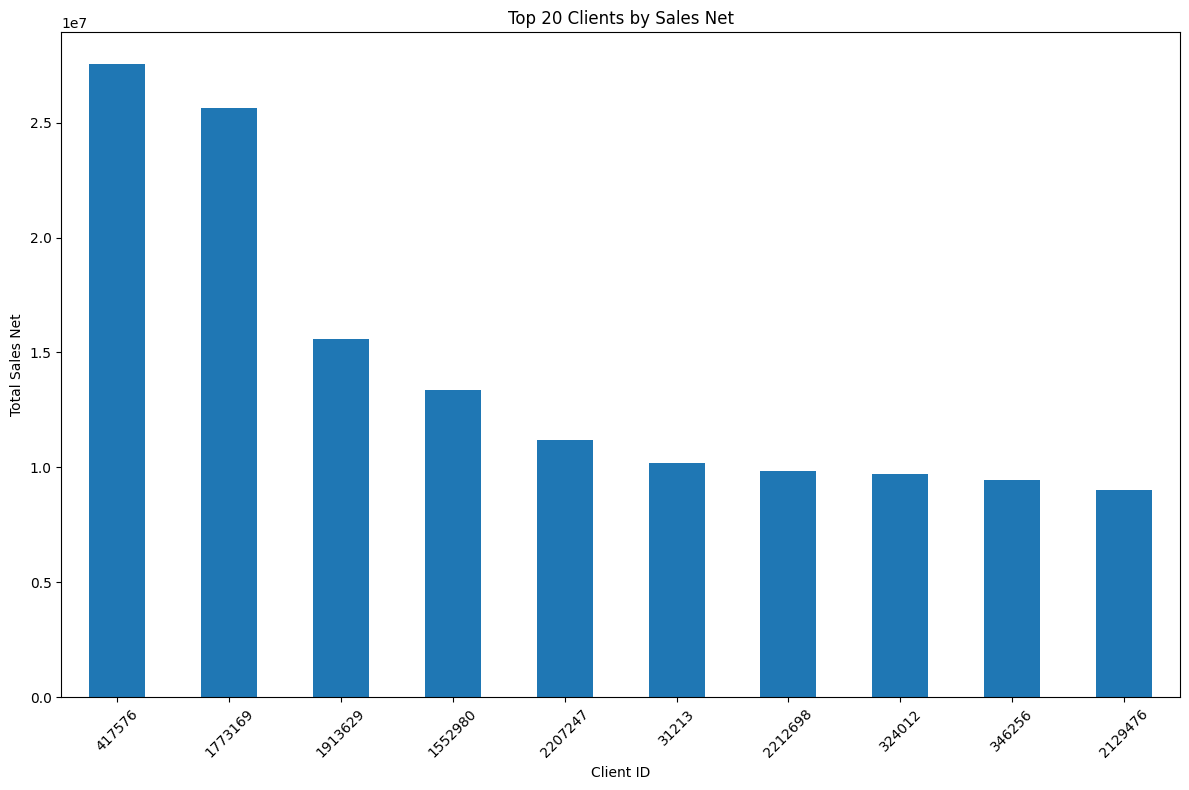

In [18]:
client_sales = transaction_data.groupby('client_id')['sales_net'].sum().sort_values(ascending=False)
print(client_sales.head(10))


plt.figure(figsize=(12, 8))
client_sales.head(10).plot(kind='bar') 
plt.title('Top 20 Clients by Sales Net')
plt.xlabel('Client ID')
plt.ylabel('Total Sales Net')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [19]:
client_counts = transaction_data['client_id'].value_counts()
print(client_counts)

417576     105636
1444500     91162
1773169     75883
2207247     64192
1552980     58067
            ...  
2225405         1
805795          1
1604674         1
1061872         1
235746          1
Name: client_id, Length: 170589, dtype: int64


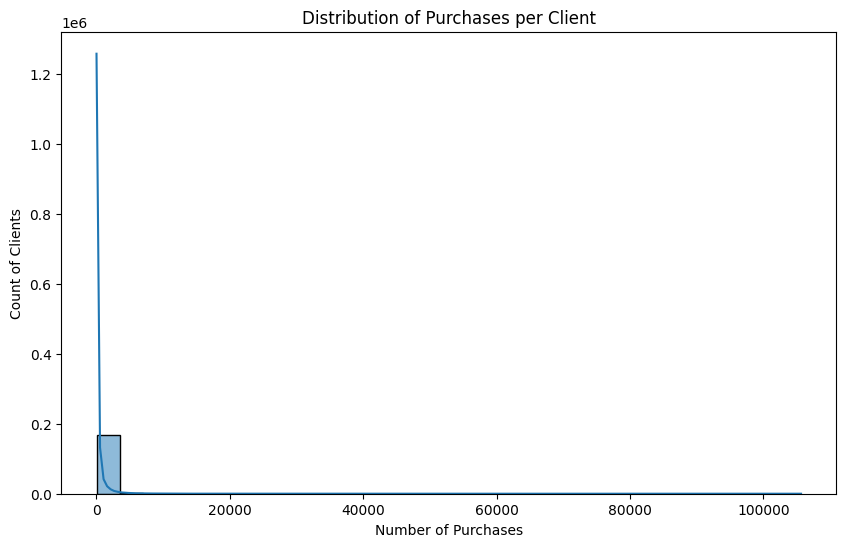

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(client_counts, bins=30, kde=True)
plt.title('Distribution of Purchases per Client')
plt.xlabel('Number of Purchases')
plt.ylabel('Count of Clients')
plt.show()

### Distribution of Sales across Different Order Channels

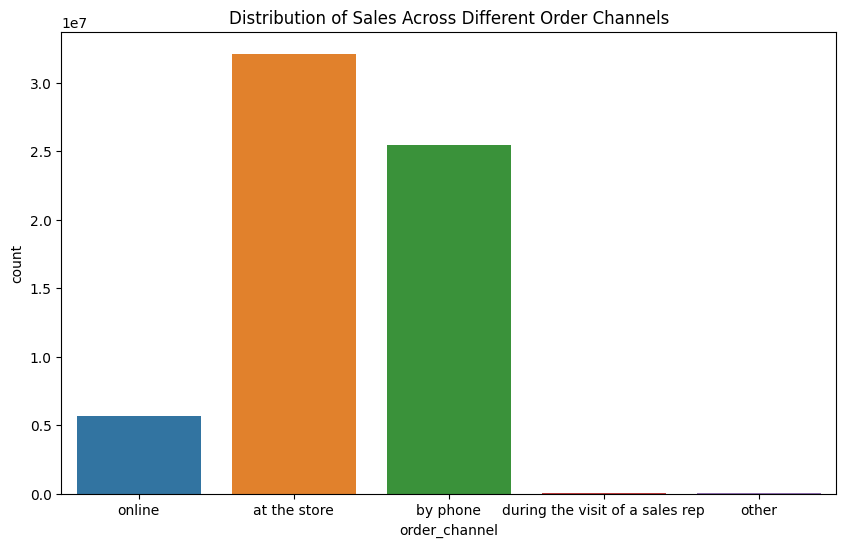

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='order_channel', data=transaction_data)
plt.title('Distribution of Sales Across Different Order Channels')
plt.show()

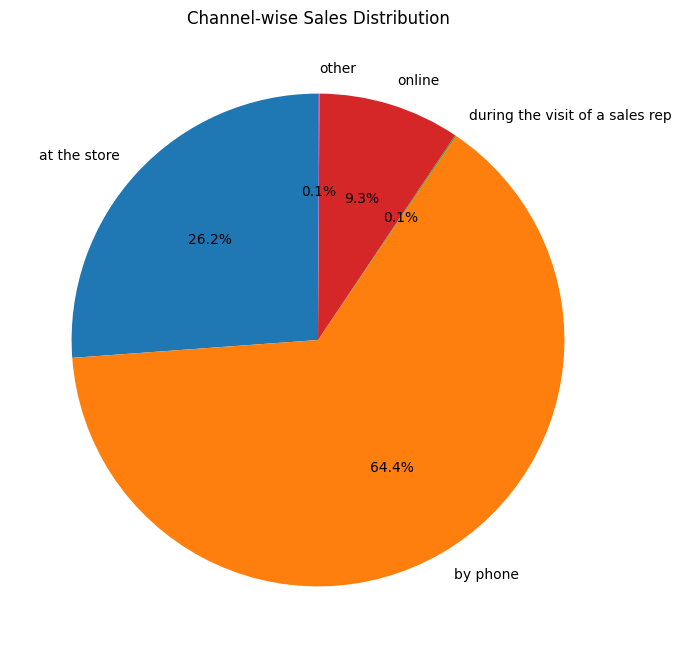

In [ ]:
channel_sales = transaction_data.groupby('order_channel')['sales_net'].sum()
plt.figure(figsize=(8, 8))
plt.pie(channel_sales, labels=channel_sales.index, autopct='%1.1f%%', startangle=90)
plt.title('Channel-wise Sales Distribution')
plt.show()

## **What do we observe here?**

In the case of our **sales analysis**, we encountred with three approaches:
- The "By phone" sales channel leads in total sales, indicating significant customer spending on larger orders or high-end products. Despite lower order frequency, "at the store" is the most commonly used channel.
- "Online" and "During the visit of a sales rep" channels boast a higher average sales value than "at the store," suggesting they attract more substantial purchases or a distinct customer segment willing to spend more per transaction.

In [121]:
# Analyze total, average, and median sales by channel
sales_channel_performance = transaction_data.groupby('order_channel').agg(
    total_sales=('sales_net', 'sum'),
    average_sales=('sales_net', 'mean'),
    median_sales=('sales_net', 'median'),
    total_orders=('client_id', 'count')
).reset_index()

In [123]:
print("Sales Channel Performance Metrics:")
sales_channel_performance

Sales Channel Performance Metrics:


,order_channel,total_sales,average_sales,median_sales,total_orders
0,at the store,2.450101e+09,76.293379,30.345372,32114196
1,by phone,6.030147e+09,236.799459,73.742600,25465205
2,during the visit of a sales rep,7.443151e+06,253.919790,65.972280,29313
3,online,8.710204e+08,154.112002,59.737440,5651866
4,other,8.849452e+06,150.667432,135.240000,58735


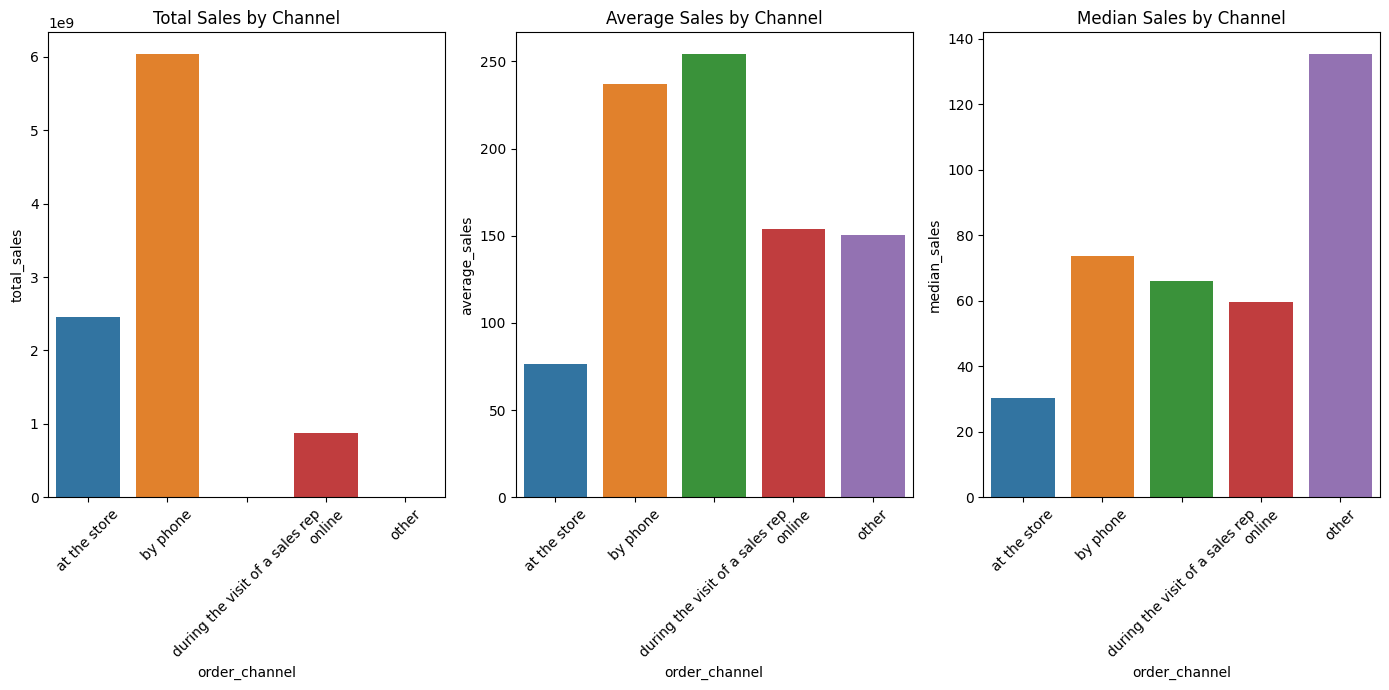

In [124]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 3, 1)
sns.barplot(x='order_channel', y='total_sales', data=sales_channel_performance)
plt.title('Total Sales by Channel')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(x='order_channel', y='average_sales', data=sales_channel_performance)
plt.title('Average Sales by Channel')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(x='order_channel', y='median_sales', data=sales_channel_performance)
plt.title('Median Sales by Channel')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Checking temporality - Monthly

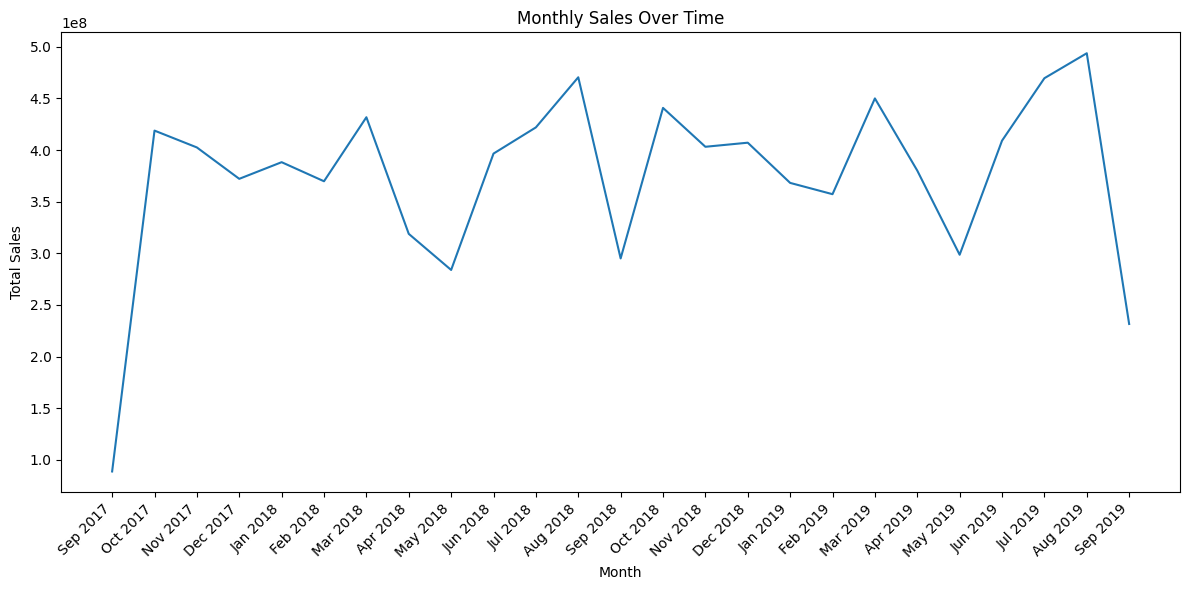

In [49]:
transaction_data['month_year'] = transaction_data['date_order'].dt.to_period('M')
monthly_sales = transaction_data.groupby('month_year')['sales_net'].sum().reset_index()

monthly_sales['month_year'] = monthly_sales['month_year'].dt.strftime('%b %Y')

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='sales_net', data=monthly_sales)

plt.xticks(rotation=45, ha='right')
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

In [ ]:
# Monthly sales
monthly_sales_table = monthly_sales.reset_index()
monthly_sales_table.columns = ['Month', 'Total Sales']
print("Monthly Sales Summary:")
print(monthly_sales_table)

Monthly Sales Summary:
        Month   Total Sales
0  2017-09-30  8.279846e+05
1  2017-10-31  4.096006e+06
2  2017-11-30  3.934368e+06
3  2017-12-31  4.002307e+06
4  2018-01-31  3.937984e+06
5  2018-02-28  3.628279e+06
6  2018-03-31  4.149667e+06
7  2018-04-30  3.044310e+06
8  2018-05-31  2.847971e+06
9  2018-06-30  4.581934e+06
10 2018-07-31  4.362841e+06
11 2018-08-31  4.837558e+06
12 2018-09-30  2.850600e+06
13 2018-10-31  4.439117e+06
14 2018-11-30  3.924709e+06
15 2018-12-31  4.013321e+06
16 2019-01-31  3.706302e+06
17 2019-02-28  3.492610e+06
18 2019-03-31  4.344051e+06
19 2019-04-30  3.780416e+06
20 2019-05-31  3.091490e+06
21 2019-06-30  4.499401e+06
22 2019-07-31  4.637037e+06
23 2019-08-31  5.315786e+06
24 2019-09-30  2.261696e+06


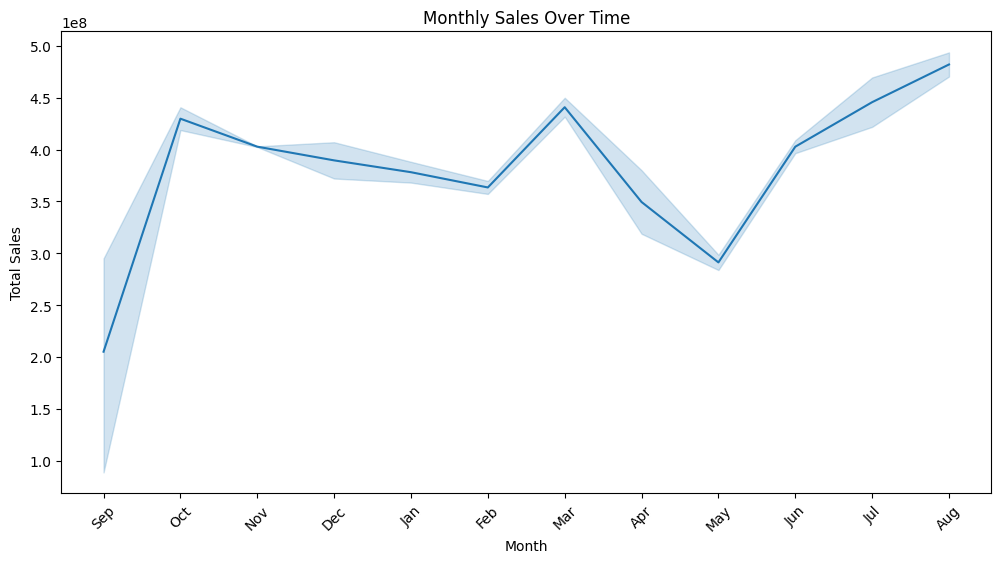

In [50]:
#Total sales by month
transaction_data['month_year'] = transaction_data['date_order'].dt.to_period('M')
monthly_sales = transaction_data.groupby('month_year')['sales_net'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['month_year'].dt.strftime('%b')  # Convert to abbreviated month names

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='sales_net', data=monthly_sales)
plt.xticks(rotation=45)
plt.title('Monthly Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Month')
plt.show()

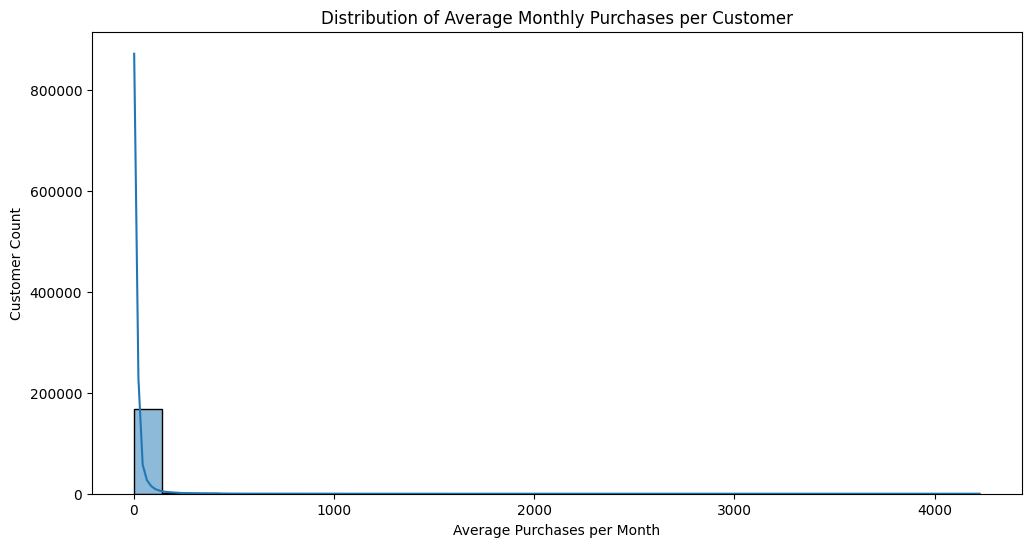

In [52]:
# Customer purchase frequency by month
customer_frequency = transaction_data.groupby(['client_id', 'month_year']).size().groupby(level=0).mean().reset_index(name='average_purchases_per_month')

plt.figure(figsize=(12, 6))
sns.histplot(customer_frequency['average_purchases_per_month'], bins=30, kde=True)
plt.title('Distribution of Average Monthly Purchases per Customer')
plt.xlabel('Average Purchases per Month')
plt.ylabel('Customer Count')
plt.show()

In [53]:
customer_frequency = customer_frequency.sort_values(by='average_purchases_per_month', ascending=False)
customer_frequency

,client_id,average_purchases_per_month
31226,417576,4225.44
108124,1444500,3646.48
132725,1773169,3035.32
165574,2207247,2567.68
116216,1552980,2322.68
...,...,...
161326,2150892,1.00
148963,1986401,1.00
107521,1435592,1.00
161329,2150905,1.00


### Checking temporality - Quarterly

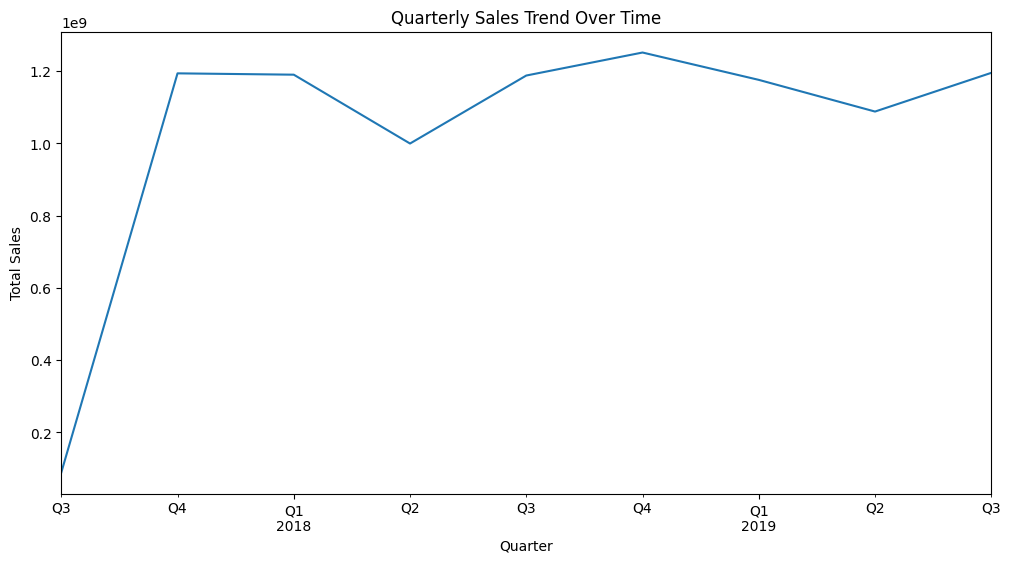

In [32]:
# Quarterly sales
quarterly_sales = transaction_data.resample('Q', on='date_order')['sales_net'].sum()

plt.figure(figsize=(12, 6))
quarterly_sales.plot(kind='line')
plt.title('Quarterly Sales Trend Over Time')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

### Top branches by total sales

Branch Performance Summary Statistics:
          branch_id   total_sales  average_sales  total_quantity  \
count    582.000000  5.820000e+02   5.820000e+02    5.820000e+02   
mean    5434.219931  1.609546e+07   7.541904e+02    1.002627e+07   
std     3308.792511  1.791780e+07   6.652014e+03    1.382812e+07   
min       20.000000 -2.842171e-14  -8.881784e-16    5.000000e+00   
25%     2654.000000  5.870715e+06   1.083800e+02    2.927222e+06   
50%     5174.000000  1.154457e+07   1.300341e+02    6.190650e+06   
75%     8607.500000  1.969132e+07   1.740564e+02    1.106434e+07   
max    11057.000000  1.226202e+08   1.178840e+05    1.279372e+08   

       transaction_count  
count         582.000000  
mean       108796.073883  
std         90791.714790  
min             1.000000  
25%         51836.750000  
50%         96461.000000  
75%        148016.500000  
max        643183.000000  


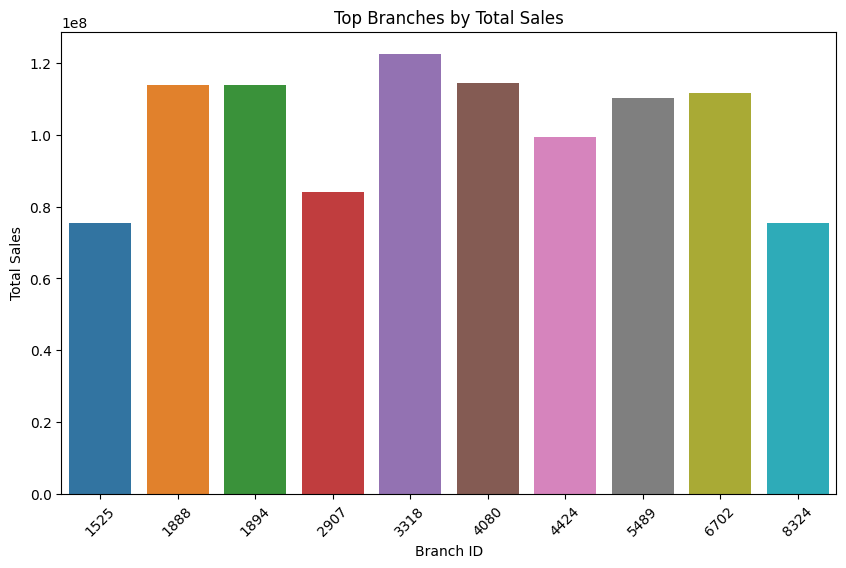

In [126]:
branch_performance = transaction_data.groupby('branch_id').agg(
    total_sales=('sales_net', 'sum'),
    average_sales=('sales_net', 'mean'),
    total_quantity=('quantity', 'sum'),
    transaction_count=('client_id', 'count')
).reset_index()


print("Branch Performance Summary Statistics:")
print(branch_performance.describe())

# We can also plot the top branches by total sales
top_branches_by_sales = branch_performance.sort_values(by='total_sales', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='branch_id', y='total_sales', data=top_branches_by_sales)
plt.title('Top Branches by Total Sales')
plt.xlabel('Branch ID')
plt.ylabel('Total Sales')
plt.xlabel('Branch ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [127]:
top_branches = branch_performance.sort_values(by='total_sales', ascending=False).head(10)

bottom_branches = branch_performance.sort_values(by='total_sales').head(10)

print("Top Performing Branches:")
print(top_branches[['branch_id', 'total_sales', 'average_sales', 'total_quantity', 'transaction_count']])

Top Performing Branches:
     branch_id   total_sales  average_sales  total_quantity  transaction_count
185       3318  1.226202e+08     190.645915       114368077             643183
226       4080  1.144099e+08     213.340200        85339931             536279
113       1894  1.140036e+08     282.712720        57213083             403249
112       1888  1.138640e+08     197.787617       105009058             575688
360       6702  1.117164e+08     250.888992        49167424             445282
308       5489  1.103480e+08     229.630960        70554067             480545
252       4424  9.948698e+07     248.372831        55974419             400555
159       2907  8.401384e+07     227.922539        49999197             368607
91        1525  7.547445e+07     267.077321        49760148             282594
423       8324  7.546247e+07     228.445007        37407165             330331


### Top products by quantity analysis

In [115]:
product_quantity = transaction_data.groupby('product_id')['quantity'].sum().reset_index()
top_products = product_quantity.sort_values(by='quantity', ascending=False).head(10) 

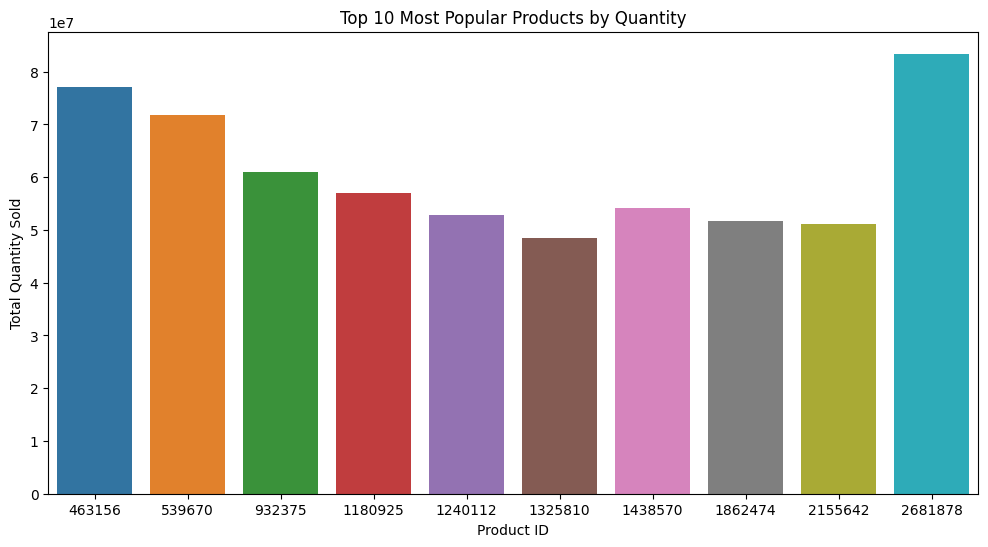

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(x='product_id', y='quantity', data=top_products)
plt.title('Top 10 Most Popular Products by Quantity')
plt.xlabel('Product ID')
plt.ylabel('Total Quantity Sold')
plt.show()

In [117]:
top_products_details = pd.merge(top_products, transaction_data[['product_id', 'sales_net', 'order_channel']], on='product_id', how='left')
print(top_products_details)

         product_id  quantity   sales_net order_channel
0           2681878  83400187  530.910380      by phone
1           2681878  83400187  988.021764      by phone
2           2681878  83400187  457.789332      by phone
3           2681878  83400187  530.910380      by phone
4           2681878  83400187  511.571060      by phone
...             ...       ...         ...           ...
1080057     1325810  48546559 -125.745600  at the store
1080058     1325810  48546559  -84.415980  at the store
1080059     1325810  48546559   -9.246000  at the store
1080060     1325810  48546559 -137.155164  at the store
1080061     1325810  48546559  -84.415980  at the store

[1080062 rows x 4 columns]


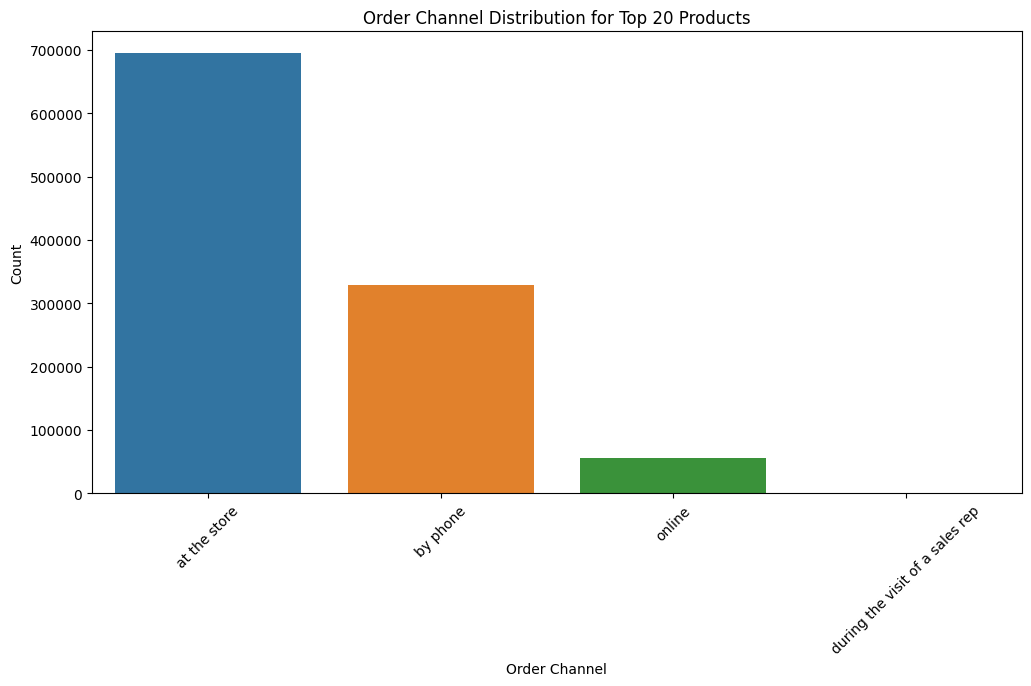

In [118]:
#Order channel for the top products
plt.figure(figsize=(12, 6))
sns.countplot(x='order_channel', data=top_products_details, order=top_products_details['order_channel'].value_counts().index[:20])
plt.title('Order Channel Distribution for Top 20 Products')
plt.xlabel('Order Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## **What do we observe here?**

From the top 20 products in the basket of ClientCo we have two channels 'at store' and 'by phone'

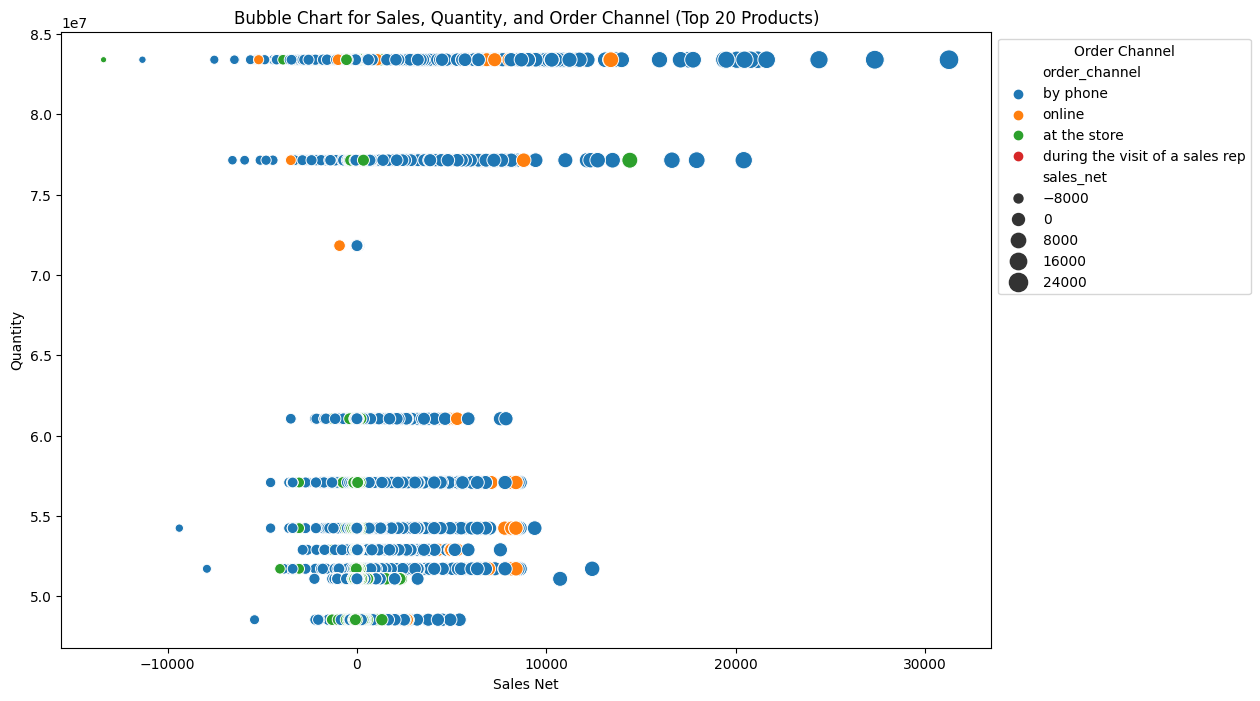

In [119]:
top20_products = top_products_details['product_id'].value_counts().index[:20]
top20_data = top_products_details[top_products_details['product_id'].isin(top20_products)]

plt.figure(figsize=(12, 8))
sns.scatterplot(x='sales_net', y='quantity', size='sales_net', hue='order_channel', data=top20_data, sizes=(20, 200))
plt.title('Bubble Chart for Sales, Quantity, and Order Channel (Top 20 Products)')
plt.xlabel('Sales Net')
plt.ylabel('Quantity')
plt.legend(title='Order Channel', bbox_to_anchor=(1, 1))
plt.show()

## **What do we observe here?**

More quantity is equal to more sales and mostly is done by phone.

# 4. Analyzing Transaction Data where Sales Net is Zero (0) or Negative

### ***Objective***
1. **Negative Transaction Overview:**
   - We identified a total of 2,384,943 negative transactions, constituting approximately 4% of our entire transaction volume.
   - The cumulative value of these negative transactions amounts to $577,294,226, equivalent to about 6% of our overall sales revenue.

2. **Matching Positive Transactions:**
   - We conducted an extensive search to match negative transactions with corresponding positive transactions. Our findings revealed 2,414,907 positive transactions that align with these negative entries.
   - This substantial number of matching transactions suggests that each negative transaction may be associated with multiple positive counterparts.

3. **Potential Scenarios:**
   - Based on our analysis, we contemplate two plausible scenarios:
     - These negative transactions could be linked to product returns.
     - Alternatively, they may be indicative of issues within our inventory management and product availability. And this is our predominant option contrasted with financials of ClientCo.

4. **Insights by Product, Branch, and Order Channel:**
   - Our analysis of negative transactions across different dimensions provides valuable insights:
     - Phone orders account for approximately 49% of negative transactions, while in-store transactions represent 46%. The remaining 5% involve other order channels.
     - Notably, phone orders contribute to 67% of the total negative sales net, indicating a more pronounced impact on our sales revenue and a propensity for higher losses compared to other channels. Additionally, the phone order channel exhibits a higher average ticket size.
     
     
5. **Geographical Relationship Analysis:**

   - Towards the end of the notebook, we explore the possibility of creating different bins to group branches with similar branch_id numbers together. This exploratory   analysis assumes that close branch_id numbers may indicate some geographical relationship.

In [75]:
negative_sales = transaction_data[transaction_data['sales_net'] < 0]
positive_sales = transaction_data[transaction_data['sales_net'] > 0]

negative_sales['abs_sales_net'] = negative_sales['sales_net'].abs()
negative_sales

C:\Users\jdiaz\AppData\Local\Temp\ipykernel_22004\3324249454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sales['abs_sales_net'] = negative_sales['sales_net'].abs()


,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_difference,order_year,order_processing_time,month_year,abs_sales_net
129,2017-09-26,2017-09-26,121848,1789606,-182.792500,25,at the store,5395,0.0,2017,0.0,2017-09,182.792500
219,2017-09-26,2017-09-26,1435071,1791722,-169.456272,51,at the store,5167,0.0,2017,0.0,2017-09,169.456272
621,2017-09-25,2017-09-27,693904,2167021,-36.901200,3,online,6184,2.0,2017,2.0,2017-09,36.901200
936,2017-09-25,2017-09-26,133038,480303,-64.446000,5,at the store,210,1.0,2017,1.0,2017-09,64.446000
1054,2017-09-25,2017-09-26,235896,1324117,-180.113000,5,by phone,10449,1.0,2017,1.0,2017-09,180.113000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63319308,2019-06-11,2020-06-09,293157,826473,-123.951600,3,at the store,2429,364.0,2019,364.0,2019-06,123.951600
63319309,2019-08-30,2020-06-11,1793357,2180864,-16.698000,3,by phone,8159,286.0,2019,286.0,2019-08,16.698000
63319310,2019-06-10,2020-06-12,1596284,245272,-2056.913000,5,by phone,7682,368.0,2019,368.0,2019-06,2056.913000
63319312,2019-07-26,2020-10-29,1168247,2063314,-204.609840,101,by phone,3014,461.0,2019,461.0,2019-07,204.609840


### Basic statistics of the negative Sales dataset:

In [77]:
print(negative_sales.describe())

         product_id     client_id     sales_net      quantity     branch_id  \
count  2.384943e+06  2.384943e+06  2.384943e+06  2.384943e+06  2.384943e+06   
mean   1.618974e+06  1.140110e+06 -2.420579e+02  7.344204e+01  5.470397e+03   
std    9.276735e+05  6.559727e+05  1.717654e+03  8.675571e+02  3.211225e+03   
min    1.500000e+01  1.400000e+01 -1.738817e+06  3.000000e+00  2.000000e+01   
25%    8.164980e+05  5.671440e+05 -2.039640e+02  3.000000e+00  2.796000e+03   
50%    1.598827e+06  1.152568e+06 -7.341600e+01  5.000000e+00  5.240000e+03   
75%    2.420503e+06  1.712258e+06 -2.260440e+01  1.500000e+01  8.482000e+03   
max    3.238800e+06  2.274508e+06 -1.840630e-02  1.800010e+05  1.105700e+04   

       time_difference    order_year  order_processing_time  abs_sales_net  
count     2.384943e+06  2.384943e+06           2.384943e+06   2.384943e+06  
mean      4.310594e+01  2.018218e+03           4.310594e+01   2.420579e+02  
std       6.541640e+01  6.739545e-01           6.541640e+

### Distribution of negative transactions across branches:

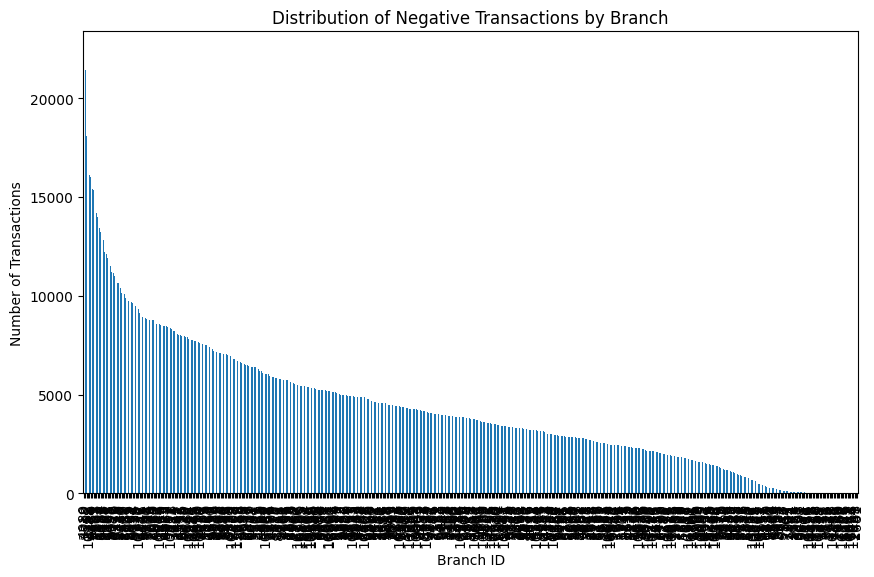

In [78]:
plt.figure(figsize=(10, 6))
negative_sales['branch_id'].value_counts().plot(kind='bar')
plt.title('Distribution of Negative Transactions by Branch')
plt.xlabel('Branch ID')
plt.ylabel('Number of Transactions')
plt.show()

### Distribution of negative transactions across unique products IDs:

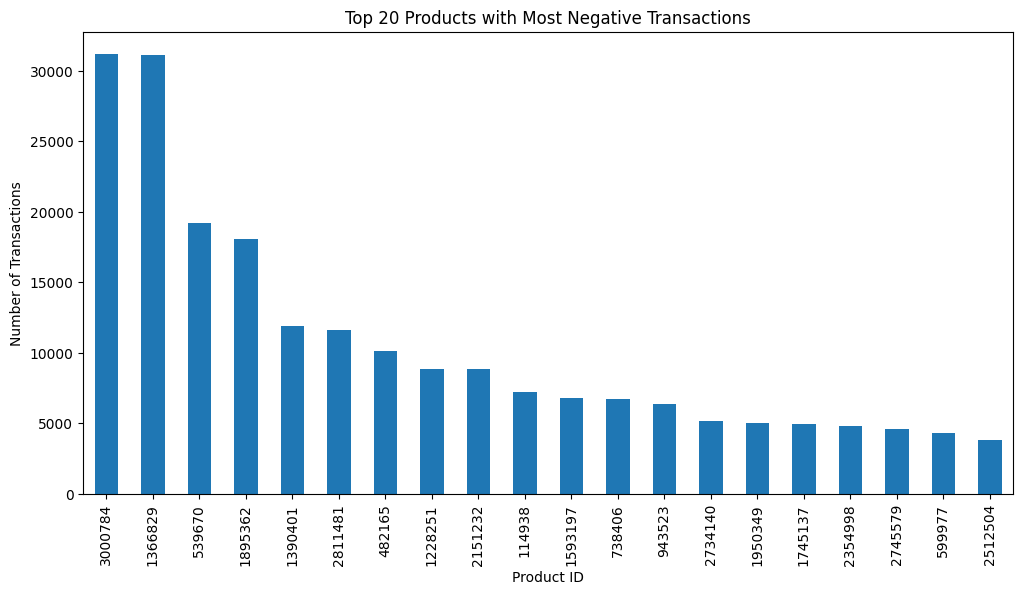

In [79]:
plt.figure(figsize=(12, 6))
negative_sales['product_id'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Products with Most Negative Transactions')
plt.xlabel('Product ID')
plt.ylabel('Number of Transactions')
plt.show()

### Transactions distribution for the Branch id:

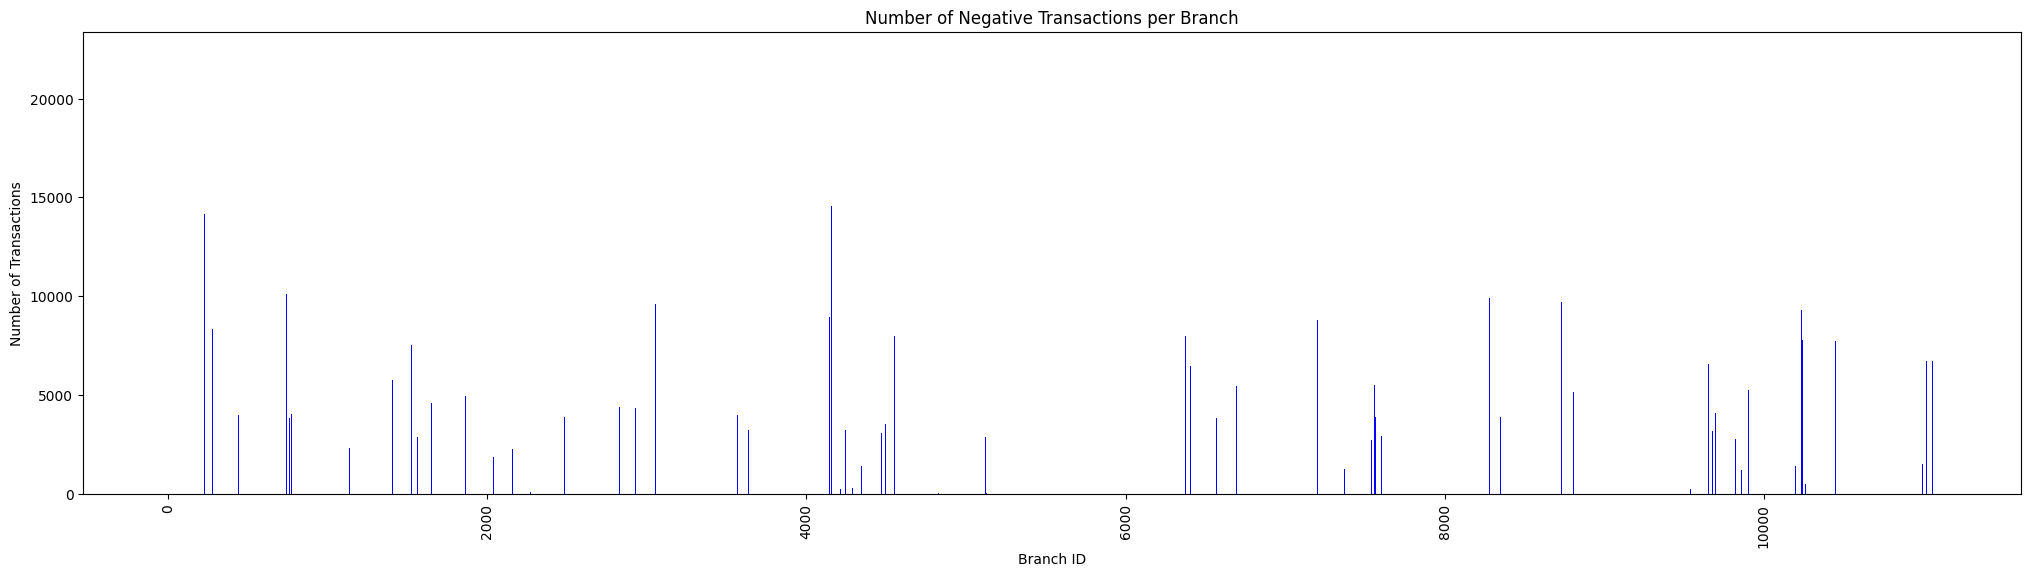

In [80]:
branch_transaction_counts = negative_sales.groupby('branch_id').size()

plt.figure(figsize=(25, 6))
plt.bar(branch_transaction_counts.index, branch_transaction_counts.values, color='blue', alpha=1)
plt.xlabel('Branch ID')
plt.ylabel('Number of Transactions')
plt.title('Number of Negative Transactions per Branch')
plt.xticks(rotation=90)
plt.show()

### Top 10 Branches with number of transaction:

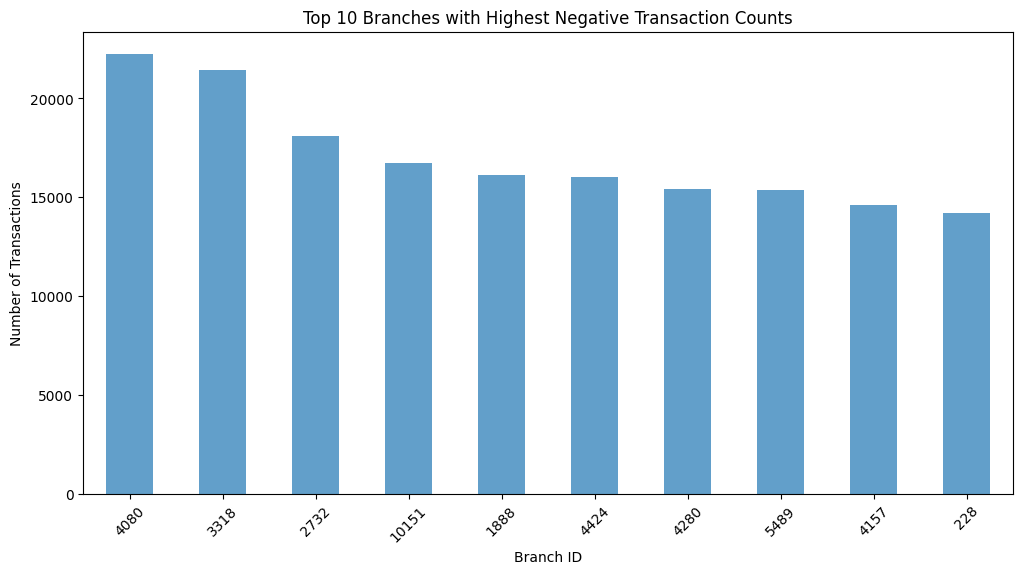

In [81]:
branch_transaction_counts = negative_sales.groupby('branch_id').size()

top_10_branches = branch_transaction_counts.sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
top_10_branches.plot(kind='bar',alpha=0.7)
plt.xlabel('Branch ID')
plt.ylabel('Number of Transactions')
plt.title('Top 10 Branches with Highest Negative Transaction Counts')
plt.xticks(rotation=45)
plt.show()

### Channels in Negative transactions:

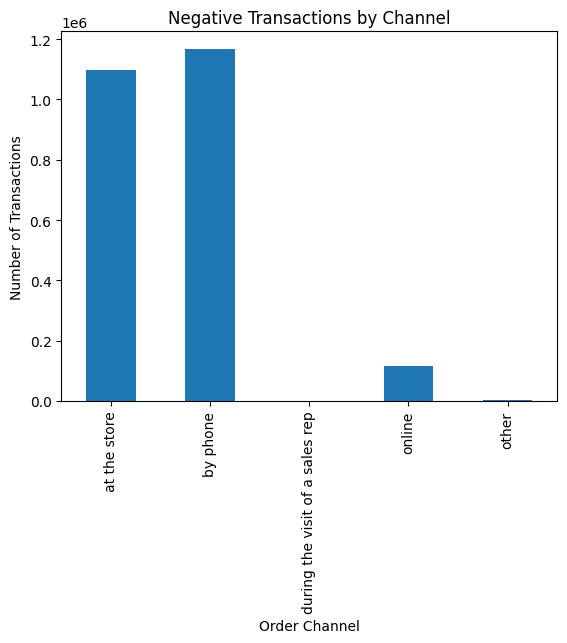

In [82]:
negative_sales.groupby('order_channel').size().plot(kind='bar', title='Negative Transactions by Channel')
plt.xlabel('Order Channel')
plt.ylabel('Number of Transactions')
plt.show()

### Merge of the negative and positive dataframes - matching pairs

In [83]:
negative_sales = negative_sales.reset_index()
positive_sales = positive_sales.reset_index()

matched_transactions = pd.merge(
    negative_sales,
    positive_sales,
    how='inner',
    left_on=['client_id', 'product_id', 'branch_id', 'abs_sales_net', 'quantity', 'order_channel'],
    right_on=['client_id', 'product_id', 'branch_id', 'sales_net','quantity', 'order_channel'],
    suffixes=('_neg', '_pos')
)

In [84]:
if len(negative_sales) > len(matched_transactions):
    unmatched_negative_transactions = negative_sales[~negative_sales.index.isin(matched_transactions['index_neg'])]
    print("There are negative transactions without matching positives.")
    print("Number of unmatched negative transactions:", len(unmatched_negative_transactions))
    print("Details of unmatched negative transactions:")
    print(unmatched_negative_transactions)
else:
    print("All negative transactions have matching positives.")

All negative transactions have matching positives.


In [85]:
unmatched_negatives = negative_sales[~negative_sales.index.isin(matched_transactions.index)]

# Get the count of unmatched negative transactions
num_unmatched_negatives = unmatched_negatives.shape[0]

if num_unmatched_negatives == 0:
    print("There are no negative transactions without matching positives.")
else:
    print("There are unmatched negative transactions.")
    print("Number of unmatched negative transactions:", num_unmatched_negatives)

if num_unmatched_negatives > 0:
    print("Details of unmatched negative transactions:")
    print(unmatched_negatives)

There are no negative transactions without matching positives.


In [86]:
matched_transactions

,index_neg,date_order_neg,date_invoice_neg,product_id,client_id,sales_net_neg,quantity,order_channel,branch_id,time_difference_neg,...,month_year_neg,abs_sales_net,index_pos,date_order_pos,date_invoice_pos,sales_net_pos,time_difference_pos,order_year_pos,order_processing_time_pos,month_year_pos
0,219,2017-09-26,2017-09-26,1435071,1791722,-169.456272,51,at the store,5167,0.0,...,2017-09,169.456272,53389,2017-09-26,2017-09-26,169.456272,0.0,2017,0.0,2017-09
1,621,2017-09-25,2017-09-27,693904,2167021,-36.901200,3,online,6184,2.0,...,2017-09,36.901200,133959,2017-09-25,2017-09-25,36.901200,0.0,2017,0.0,2017-09
2,1054,2017-09-25,2017-09-26,235896,1324117,-180.113000,5,by phone,10449,1.0,...,2017-09,180.113000,33212,2017-09-25,2017-09-26,180.113000,1.0,2017,1.0,2017-09
3,1453,2017-09-25,2017-09-25,1505281,2018979,-60.976450,17,at the store,10776,0.0,...,2017-09,60.976450,84450,2017-09-25,2017-09-25,60.976450,0.0,2017,0.0,2017-09
4,1747,2017-09-25,2017-09-25,1835375,1888913,-640.895000,5,at the store,358,0.0,...,2017-09,640.895000,264704,2017-09-25,2017-09-25,640.895000,0.0,2017,0.0,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4829809,63319298,2019-04-29,2020-04-13,1389771,1598080,-139.311000,5,at the store,8927,350.0,...,2019-04,139.311000,63299348,2019-04-29,2020-04-13,139.311000,350.0,2019,350.0,2019-04
4829810,63319304,2019-09-09,2020-05-01,3031712,1334329,-220.082400,9,at the store,2523,235.0,...,2019-09,220.082400,62640911,2019-09-09,2019-09-19,220.082400,10.0,2019,10.0,2019-09
4829811,63319305,2019-08-21,2020-05-21,1134550,1525717,-89.915280,21,by phone,3371,274.0,...,2019-08,89.915280,63177339,2019-08-21,2019-10-18,89.915280,58.0,2019,58.0,2019-08
4829812,63319306,2019-07-19,2020-08-04,1331967,181771,-3722.991600,3,by phone,7993,382.0,...,2019-07,3722.991600,57724751,2019-07-19,2019-07-29,3722.991600,10.0,2019,10.0,2019-07


In [87]:
num_negative_rows = negative_sales.shape[0]
num_matched_rows = matched_transactions.shape[0] // 2 
print("Number of negative rows:", num_negative_rows)
print("Number of matching positive rows:", num_matched_rows)

Number of negative rows: 2384943
Number of matching positive rows: 2414907


## **What do we observe here?**

After this process we found that we have 2,414,907 rows matching the negative transaction we have , which may indicate that some of the neagtive transacions have more than one postive match .

In [88]:
#First matched positive and negative transactions
if not matched_transactions.empty:
    example_matched_transaction = matched_transactions.head(5)
    print("Example of Matched Negative and Positive Transaction:")
    print(example_matched_transaction)
else:
    print("No matched transactions found.")

Example of Matched Negative and Positive Transaction:
   index_neg date_order_neg date_invoice_neg  product_id  client_id  \
0        219     2017-09-26       2017-09-26     1435071    1791722   
1        621     2017-09-25       2017-09-27      693904    2167021   
2       1054     2017-09-25       2017-09-26      235896    1324117   
3       1453     2017-09-25       2017-09-25     1505281    2018979   
4       1747     2017-09-25       2017-09-25     1835375    1888913   

   sales_net_neg  quantity order_channel  branch_id  time_difference_neg  ...  \
0    -169.456272        51  at the store       5167                  0.0  ...   
1     -36.901200         3        online       6184                  2.0  ...   
2    -180.113000         5      by phone      10449                  1.0  ...   
3     -60.976450        17  at the store      10776                  0.0  ...   
4    -640.895000         5  at the store        358                  0.0  ...   

   month_year_neg  abs_sales_net

In [89]:
example_pair = matched_transactions.head(1)
example_pair

,index_neg,date_order_neg,date_invoice_neg,product_id,client_id,sales_net_neg,quantity,order_channel,branch_id,time_difference_neg,...,month_year_neg,abs_sales_net,index_pos,date_order_pos,date_invoice_pos,sales_net_pos,time_difference_pos,order_year_pos,order_processing_time_pos,month_year_pos
0,219,2017-09-26,2017-09-26,1435071,1791722,-169.456272,51,at the store,5167,0.0,...,2017-09,169.456272,53389,2017-09-26,2017-09-26,169.456272,0.0,2017,0.0,2017-09


In [90]:
if not matched_transactions.empty:
    example_matched_transaction = matched_transactions.head(1)

    neg_row_number = example_matched_transaction['index_neg'].iloc[0]
    pos_row_number = example_matched_transaction['index_pos'].iloc[0]

    print("Row number in original DataFrame for the negative transaction:", neg_row_number)
    print("Row number in original DataFrame for the positive transaction:", pos_row_number)
else:
    print("No matched transactions found.")

Row number in original DataFrame for the negative transaction: 219
Row number in original DataFrame for the positive transaction: 53389


In [94]:
if len(matched_transactions) > 1:
    # Get the second matched pair
    example_matched_transaction = matched_transactions.iloc[1]

    # Extract original row numbers
    neg_row_number = example_matched_transaction['index_neg']
    pos_row_number = example_matched_transaction['index_pos']

    print("Row number in original DataFrame for the negative transaction:", neg_row_number)
    print("Row number in original DataFrame for the positive transaction:", pos_row_number)

    # Display the rows from the original DataFrame
    print("\nNegative Transaction (Row {}):".format(neg_row_number))
    print(transaction_data.iloc[neg_row_number])

    print("\nPositive Transaction (Row {}):".format(pos_row_number))
    print(transaction_data.iloc[pos_row_number])
else:
    print("Not enough matched transactions to show a second example.")

Row number in original DataFrame for the negative transaction: 621
Row number in original DataFrame for the positive transaction: 133959

Negative Transaction (Row 621):
date_order               2017-09-25 00:00:00
date_invoice             2017-09-27 00:00:00
product_id                            693904
client_id                            2167021
sales_net                           -36.9012
quantity                                   3
order_channel                         online
branch_id                               6184
time_difference                          2.0
order_year                              2017
order_processing_time                    2.0
month_year                           2017-09
Name: 621, dtype: object

Positive Transaction (Row 133959):
date_order               2017-09-25 00:00:00
date_invoice             2017-09-25 00:00:00
product_id                            693904
client_id                            2167021
sales_net                            36.9012
quan

In [95]:
row_number = 622  
displayed_row = transaction_data.iloc[row_number - 1]  
print(displayed_row)

date_order               2017-09-25 00:00:00
date_invoice             2017-09-27 00:00:00
product_id                            693904
client_id                            2167021
sales_net                           -36.9012
quantity                                   3
order_channel                         online
branch_id                               6184
time_difference                          2.0
order_year                              2017
order_processing_time                    2.0
month_year                           2017-09
Name: 621, dtype: object


In [96]:
row_number = 133960 
displayed_row = transaction_data.iloc[row_number - 1]  
print(displayed_row)

date_order               2017-09-25 00:00:00
date_invoice             2017-09-25 00:00:00
product_id                            693904
client_id                            2167021
sales_net                            36.9012
quantity                                   3
order_channel                         online
branch_id                               6184
time_difference                          0.0
order_year                              2017
order_processing_time                    0.0
month_year                           2017-09
Name: 133959, dtype: object


#### Examples on matching negative and postive transaction from our data set ( check the output from example 55 to 66 and 26 ):

In [98]:
num_examples = 100 

if len(matched_transactions) >= num_examples:
    for i in range(num_examples):
        matched_transaction = matched_transactions.iloc[i]
        
        neg_row_number = matched_transaction['index_neg']
        pos_row_number = matched_transaction['index_pos']

        print(f"Example {i + 1}:")
        print("Row number in original DataFrame for the negative transaction:", neg_row_number)
        print("Row number in original DataFrame for the positive transaction:", pos_row_number)

        print("\nNegative Transaction (Row {}):".format(neg_row_number))
        print(transaction_data.iloc[neg_row_number])

        print("\nPositive Transaction (Row {}):".format(pos_row_number))
        print(transaction_data.iloc[pos_row_number])
        print("\n-----------------------------------\n")
else:
    print(f"Not enough matched transactions to show {num_examples} examples.")


Example 1:
Row number in original DataFrame for the negative transaction: 219
Row number in original DataFrame for the positive transaction: 53389

Negative Transaction (Row 219):
date_order               2017-09-26 00:00:00
date_invoice             2017-09-26 00:00:00
product_id                           1435071
client_id                            1791722
sales_net                        -169.456272
quantity                                  51
order_channel                   at the store
branch_id                               5167
time_difference                          0.0
order_year                              2017
order_processing_time                    0.0
month_year                           2017-09
Name: 219, dtype: object

Positive Transaction (Row 53389):
date_order               2017-09-26 00:00:00
date_invoice             2017-09-26 00:00:00
product_id                           1435071
client_id                            1791722
sales_net                         169.45

In [99]:
neg_indices = matched_transactions['index_neg'].tolist()
pos_indices = matched_transactions['index_pos'].tolist()

# Combine the indices:
all_indices = neg_indices + pos_indices

In [101]:
matched_rows_df = transaction_data.iloc[all_indices]

In [102]:
print("New DataFrame with Matched Negative and Positive Transactions:")
print(matched_rows_df.head()) 

New DataFrame with Matched Negative and Positive Transactions:
     date_order date_invoice  product_id  client_id   sales_net  quantity  \
219  2017-09-26   2017-09-26     1435071    1791722 -169.456272        51   
621  2017-09-25   2017-09-27      693904    2167021  -36.901200         3   
1054 2017-09-25   2017-09-26      235896    1324117 -180.113000         5   
1453 2017-09-25   2017-09-25     1505281    2018979  -60.976450        17   
1747 2017-09-25   2017-09-25     1835375    1888913 -640.895000         5   

     order_channel  branch_id  time_difference  order_year  \
219   at the store       5167              0.0        2017   
621         online       6184              2.0        2017   
1054      by phone      10449              1.0        2017   
1453  at the store      10776              0.0        2017   
1747  at the store        358              0.0        2017   

      order_processing_time month_year  
219                     0.0    2017-09  
621                

In [103]:
len(all_indices)

9659628

### Bins for branches:

In [104]:
unique_branch_count = transaction_data['branch_id'].nunique()
print("Number of unique branches:", unique_branch_count)

Number of unique branches: 582


In [105]:
smallest_branch_id = negative_sales['branch_id'].min()
largest_branch_id = negative_sales['branch_id'].max()

print("Smallest Branch ID:", smallest_branch_id)
print("Largest Branch ID:", largest_branch_id)

Smallest Branch ID: 20
Largest Branch ID: 11057


In [106]:
# Defining new bin edges 
bin_edges = list(range(20, largest_branch_id + 2000, 2000))

negative_sales['branch_id_bins'] = pd.cut(negative_sales['branch_id'], bins=bin_edges)

print(negative_sales.head())

   index date_order date_invoice  product_id  client_id   sales_net  quantity  \
0    129 2017-09-26   2017-09-26      121848    1789606 -182.792500        25   
1    219 2017-09-26   2017-09-26     1435071    1791722 -169.456272        51   
2    621 2017-09-25   2017-09-27      693904    2167021  -36.901200         3   
3    936 2017-09-25   2017-09-26      133038     480303  -64.446000         5   
4   1054 2017-09-25   2017-09-26      235896    1324117 -180.113000         5   

  order_channel  branch_id  time_difference  order_year  \
0  at the store       5395              0.0        2017   
1  at the store       5167              0.0        2017   
2        online       6184              2.0        2017   
3  at the store        210              1.0        2017   
4      by phone      10449              1.0        2017   

   order_processing_time month_year  abs_sales_net  branch_id_bins  
0                    0.0    2017-09     182.792500    (4020, 6020]  
1                   

In [107]:
sales_by_bin = negative_sales.groupby('branch_id_bins')['abs_sales_net'].sum()
sales_by_bin

branch_id_bins
(20, 2020]        1.030802e+08
(2020, 4020]      1.088584e+08
(4020, 6020]      1.239190e+08
(6020, 8020]      8.110751e+07
(8020, 10020]     1.136092e+08
(10020, 12020]    4.488797e+07
Name: abs_sales_net, dtype: float64

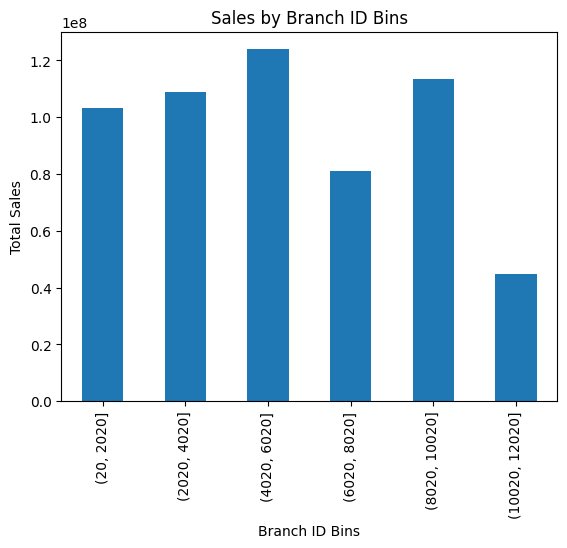

In [108]:
sales_by_bin.plot(kind='bar')
plt.xlabel('Branch ID Bins')
plt.ylabel('Total Sales')
plt.title('Sales by Branch ID Bins')
plt.show()

## ***VISUALITZATIONS SEPARATELY: POSITIVE, NEGATIVE AND ZERO SALES***
### ***Objective***
Visualize the proportion of transactions where the sales net amount is greater than 0, equal to 0, and less than 0.

### ***Methodology:***
**Data Segmentation**:
   - Segmented the transaction data into three categories:
     - Transactions with sales net amount > 0
     - Transactions with sales net amount = 0
     - Transactions with sales net amount < 0

In [54]:
zero_sales_net = transaction_data[transaction_data['sales_net'] == 0]

In [55]:
zero_sales_net.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_difference,order_year,order_processing_time,month_year
10,2017-09-25,2017-09-25,1294793,2272258,0.0,21,by phone,2523,0.0,2017,0.0,2017-09
18,2017-09-25,2017-09-25,1423458,2272258,0.0,31,by phone,2523,0.0,2017,0.0,2017-09
108,2017-09-25,2017-09-25,3137129,166824,0.0,3,at the store,9686,0.0,2017,0.0,2017-09
145,2017-09-26,2017-09-26,305746,1306326,0.0,13,at the store,1877,0.0,2017,0.0,2017-09
213,2017-09-26,2017-09-26,851737,1611833,0.0,41,at the store,3417,0.0,2017,0.0,2017-09


In [56]:
negative_sales_net = transaction_data[transaction_data['sales_net'] < 0]

In [57]:
negative_sales_net.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_difference,order_year,order_processing_time,month_year
129,2017-09-26,2017-09-26,121848,1789606,-182.792500,25,at the store,5395,0.0,2017,0.0,2017-09
219,2017-09-26,2017-09-26,1435071,1791722,-169.456272,51,at the store,5167,0.0,2017,0.0,2017-09
621,2017-09-25,2017-09-27,693904,2167021,-36.901200,3,online,6184,2.0,2017,2.0,2017-09
936,2017-09-25,2017-09-26,133038,480303,-64.446000,5,at the store,210,1.0,2017,1.0,2017-09
1054,2017-09-25,2017-09-26,235896,1324117,-180.113000,5,by phone,10449,1.0,2017,1.0,2017-09


In [58]:
positive_sales_net = transaction_data[transaction_data['sales_net'] > 0]

In [59]:
positive_sales_net.head()

,date_order,date_invoice,product_id,client_id,sales_net,quantity,order_channel,branch_id,time_difference,order_year,order_processing_time,month_year
0,2017-09-25,2017-09-25,2376333,188502,155.44320,3,online,2732,0.0,2017,0.0,2017-09
1,2017-09-25,2017-09-25,2520527,835089,16.39440,3,at the store,10279,0.0,2017,0.0,2017-09
2,2017-09-25,2017-09-25,2536756,1977896,365.76624,21,online,6184,0.0,2017,0.0,2017-09
3,2017-09-25,2017-09-25,3028673,598816,8.59878,201,at the store,4200,0.0,2017,0.0,2017-09
4,2017-09-25,2017-09-25,203377,2086861,1093.37400,3,by phone,7051,0.0,2017,0.0,2017-09


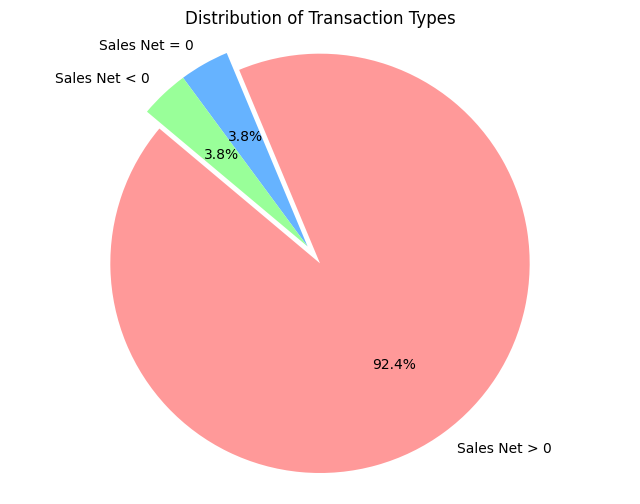

In [60]:
num_positive_sales = len(positive_sales_net)
num_zero_sales = len(zero_sales_net)
num_negative_sales = len(negative_sales_net)

labels = ['Sales Net > 0', 'Sales Net = 0', 'Sales Net < 0']
sizes = [num_positive_sales, num_zero_sales, num_negative_sales]
colors = ['#ff9999','#66b3ff','#99ff99']
explode = (0.1, 0, 0)  # explode the 1st slice (Sales > 0)

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transaction Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [61]:
top_positive_sales = positive_sales_net.groupby('product_id')['sales_net'].sum().nlargest(30).index
top_negative_sales = negative_sales_net.groupby('product_id')['sales_net'].sum().nlargest(30).index
top_zero_sales = zero_sales_net.groupby('product_id')['sales_net'].sum().nlargest(30).index

In [62]:
top_positive_sales

Int64Index([2681878,  463156, 2542409, 1253061, 1325810,  875236,  560204,
            2564840, 1954776,  199095,  829020, 2008648,  417321,  915256,
            3152916, 1142551, 2734140, 1696760, 2995747, 1390401, 2354998,
             572469,  642862,  954487, 2985824, 1078192, 2732769, 1461750,
              59473, 2198494],
           dtype='int64', name='product_id')

In [63]:
top_negative_sales

Int64Index([2285904, 1782267,  125952,  271065,  801953, 1244923, 1271618,
            1291398, 1446339, 1502406, 1795383, 2384956, 2414271, 2565269,
            2878897, 2888183, 3093149, 3131458, 2375830, 3134837, 2449191,
             260412,  684369, 1611448, 1877387, 1919643, 1921051, 2244333,
            2313044, 2343917],
           dtype='int64', name='product_id')

In [64]:
top_zero_sales

Int64Index([ 15,  65,  90,  98, 129, 161, 185, 190, 206, 258, 346, 393, 414,
            430, 431, 504, 546, 578, 585, 686, 699, 776, 803, 858, 891, 930,
            935, 942, 980, 988],
           dtype='int64', name='product_id')

### Top products by quantity:

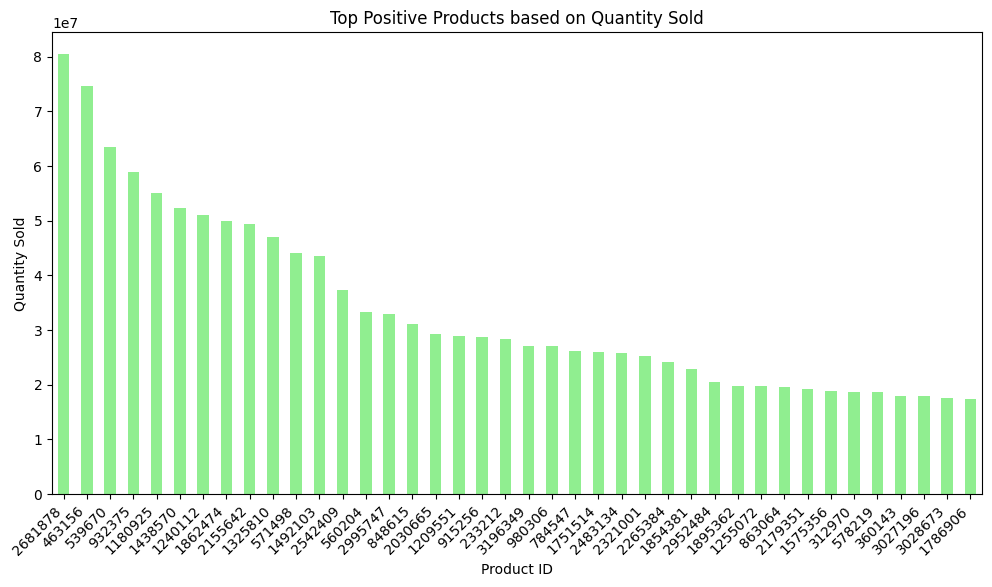

In [65]:
top_products = positive_sales_net.groupby('product_id')['quantity'].sum().nlargest(40)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='lightgreen')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top Positive Products based on Quantity Sold')
plt.xticks(rotation=45, ha='right')  
plt.grid(False)  
plt.show()

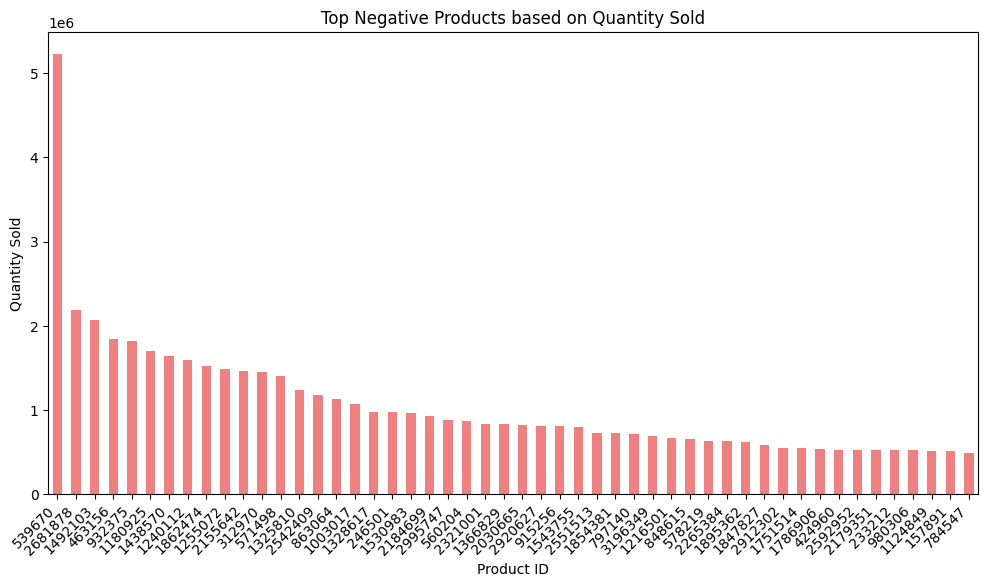

In [66]:
top_products = negative_sales_net.groupby('product_id')['quantity'].sum().nlargest(50)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='lightcoral')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top Negative Products based on Quantity Sold')
plt.xticks(rotation=45, ha='right') 
plt.grid(False)  
plt.show()

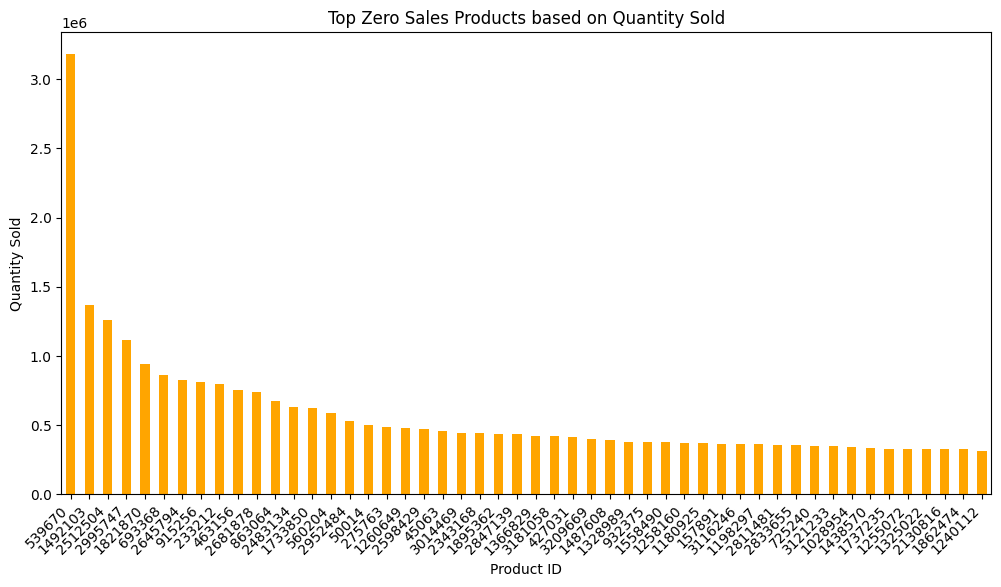

In [67]:
top_products = zero_sales_net.groupby('product_id')['quantity'].sum().nlargest(50)

plt.figure(figsize=(12, 6))
top_products.plot(kind='bar', color='orange')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.title('Top Zero Sales Products based on Quantity Sold')
plt.xticks(rotation=45, ha='right') 
plt.grid(False)  
plt.show()

## **What do we observe here?**

Analyzing both the negative and zero sales net datasets, a notable pattern emerges: the initial product listed (Product ID: 539670) is consistently the top performer in terms of quantity sold. This observation indicates a significant sales volume for the first product in these datasets, emphasizing its prominence and popularity even in scenarios where sales yield negative.

### Sales Trends over time:

C:\Users\jdiaz\AppData\Local\Temp\ipykernel_22004\3834414145.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_sales_net['month_year'] = positive_sales_net['date_order'].dt.to_period('M')


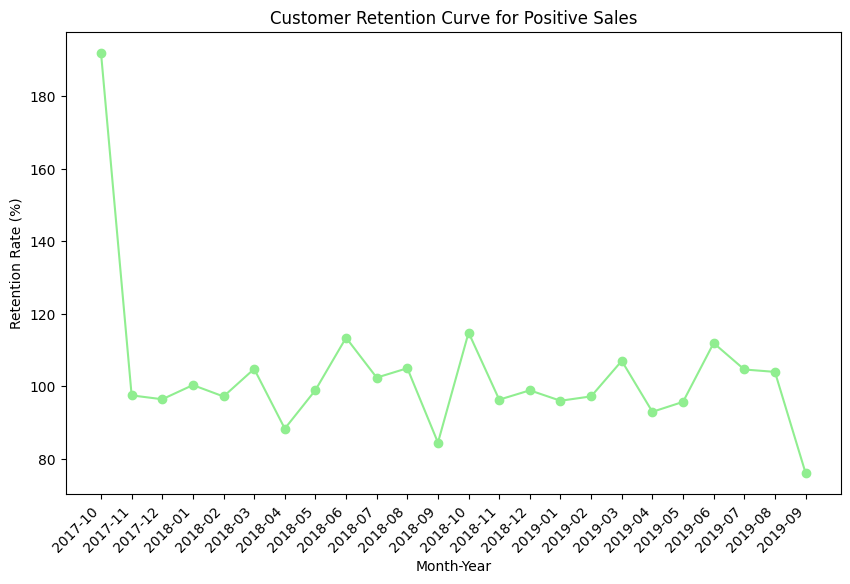

In [68]:
positive_sales_net['month_year'] = positive_sales_net['date_order'].dt.to_period('M')

# Calculate the number of unique clients for each month
monthly_clients = positive_sales_net.groupby('month_year')['client_id'].nunique()

# Calculate the retention rate over time
retention_rate = monthly_clients / monthly_clients.shift(1)

# Remove the first month since retention rate is not defined for the first month
retention_rate = retention_rate[1:]

# Plot the Customer Retention Curve
plt.figure(figsize=(10, 6))
plt.plot(retention_rate.index.astype(str), retention_rate.values * 100, marker='o', linestyle='-', color='lightgreen')
plt.xlabel('Month-Year')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Curve for Positive Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  # Remove the grid
plt.show()

C:\Users\jdiaz\AppData\Local\Temp\ipykernel_22004\906327953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_sales_net['month_year'] = negative_sales_net['date_order'].dt.to_period('M')


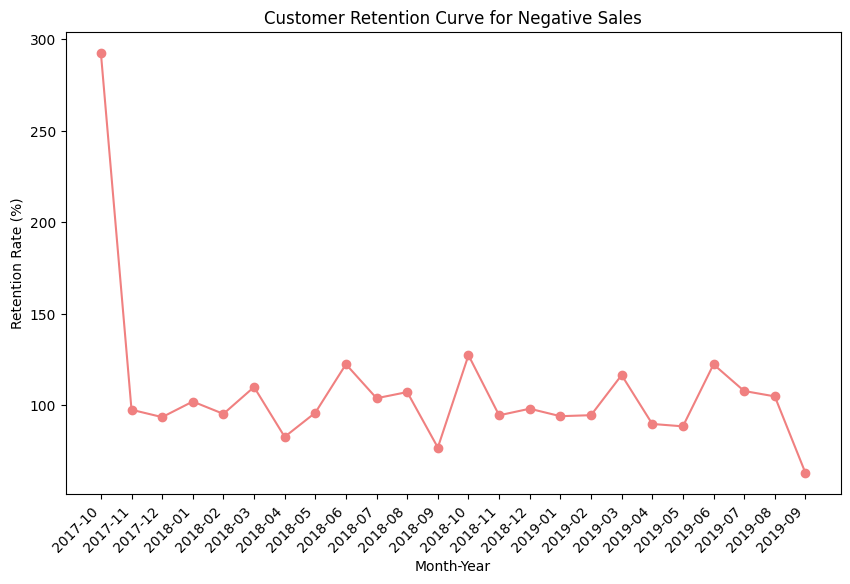

In [69]:
negative_sales_net['month_year'] = negative_sales_net['date_order'].dt.to_period('M')

# Calculate the number of unique clients for each month
monthly_clients = negative_sales_net.groupby('month_year')['client_id'].nunique()

# Calculate the retention rate over time
retention_rate = monthly_clients / monthly_clients.shift(1)

# Remove the first month since retention rate is not defined for the first month
retention_rate = retention_rate[1:]

# Plot the Customer Retention Curve
plt.figure(figsize=(10, 6))
plt.plot(retention_rate.index.astype(str), retention_rate.values * 100, marker='o', linestyle='-', color='lightcoral')
plt.xlabel('Month-Year')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Curve for Negative Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  # Remove the grid
plt.show()

C:\Users\jdiaz\AppData\Local\Temp\ipykernel_22004\4206269264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_sales_net['month_year'] = zero_sales_net['date_order'].dt.to_period('M')


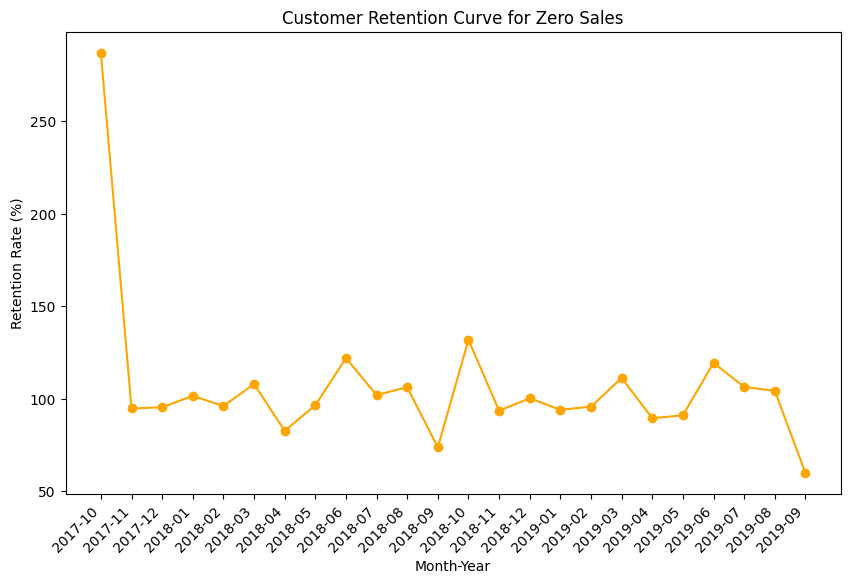

In [70]:
zero_sales_net['month_year'] = zero_sales_net['date_order'].dt.to_period('M')

# Calculate the number of unique clients for each month
monthly_clients = zero_sales_net.groupby('month_year')['client_id'].nunique()

# Calculate the retention rate over time
retention_rate = monthly_clients / monthly_clients.shift(1)

# Remove the first month since retention rate is not defined for the first month
retention_rate = retention_rate[1:]

# Plot the Customer Retention Curve
plt.figure(figsize=(10, 6))
plt.plot(retention_rate.index.astype(str), retention_rate.values * 100, marker='o', linestyle='-', color='orange')
plt.xlabel('Month-Year')
plt.ylabel('Retention Rate (%)')
plt.title('Customer Retention Curve for Zero Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(False)  # Remove the grid
plt.show()

## **What do we observe here?**

The Customer Retention Curves from the three datasets (positive, negative, and zero) are the same, it indicates that the retention patterns over time are consistent across the different scenarios (positive sales, negative sales, and zero sales). The Customer Retention Curve reflects how many unique clients continue to make purchases over subsequent periods. The curves are the same for all three scenarios, it suggests that the factors influencing customer retention are similar regardless of whether the sales were positive, negative, or zero. Why? Possible factors:

- Consistent Customer Behavior: The customers may exhibit similar buying patterns over time, regardless of the sales outcome.
- Common External Factors: External factors affecting customer retention, such as market trends or economic conditions, might be influencing all types of sales uniformly.
- Similar Product Categories: If the products involved in positive, negative, and zero sales are similar, it could contribute to similar customer retention patterns.

### Order Channel Analysis:

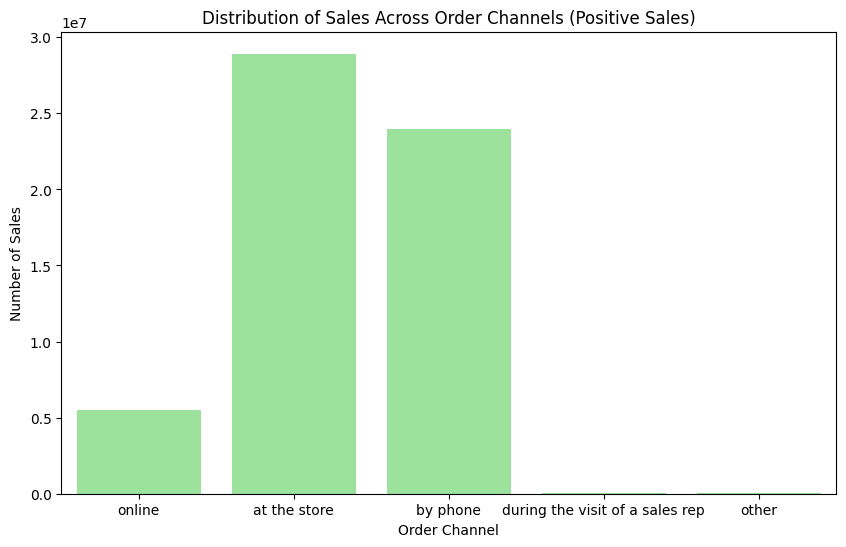

In [109]:
plt.figure(figsize=(10, 6))
sns.countplot(x='order_channel', data=positive_sales_net, color='lightgreen')
plt.title('Distribution of Sales Across Order Channels (Positive Sales)')
plt.xlabel('Order Channel')
plt.ylabel('Number of Sales')
plt.grid(False)  
plt.show()

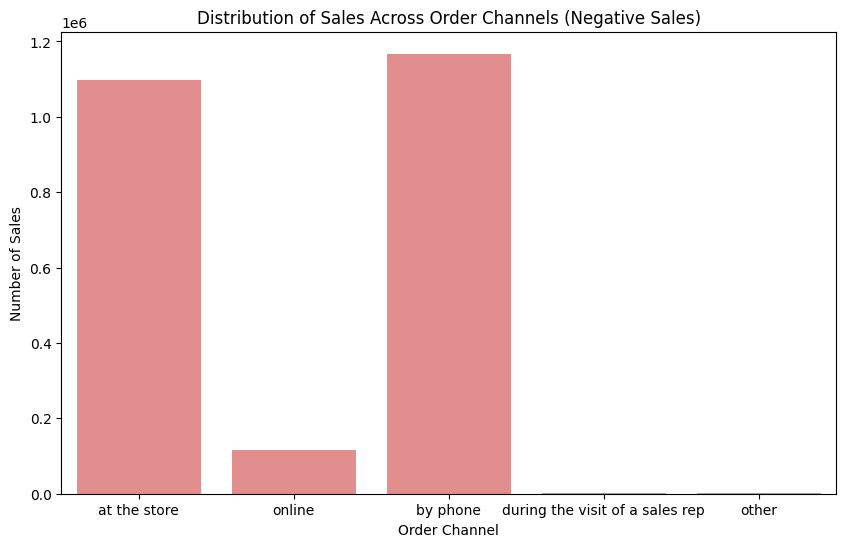

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(x='order_channel', data=negative_sales_net, color='lightcoral')
plt.title('Distribution of Sales Across Order Channels (Negative Sales)')
plt.xlabel('Order Channel')
plt.ylabel('Number of Sales')
plt.grid(False)  
plt.show()

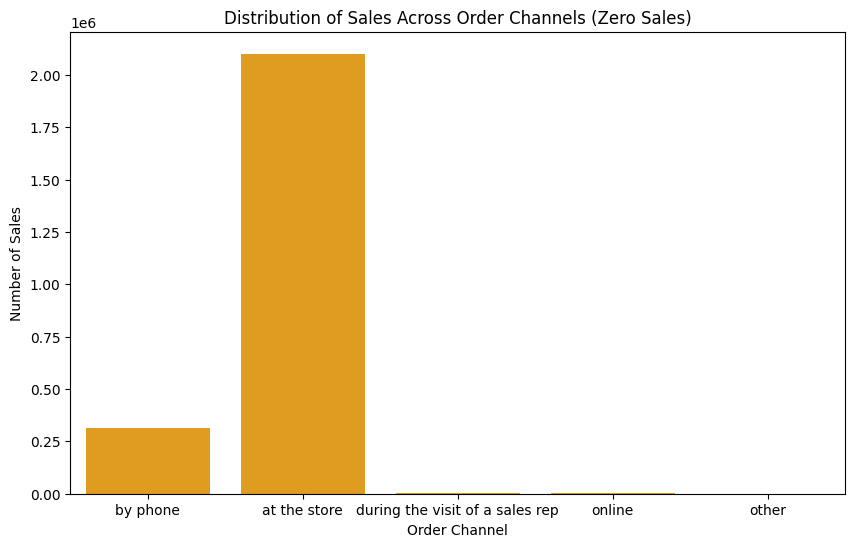

In [111]:
plt.figure(figsize=(10, 6))
sns.countplot(x='order_channel', data=zero_sales_net, color='orange')
plt.title('Distribution of Sales Across Order Channels (Zero Sales)')
plt.xlabel('Order Channel')
plt.ylabel('Number of Sales')
plt.grid(False)  
plt.show()

## **What do we observe here?**

The analysis reveals a dominant use of phone and in-store channels for both positive and negative sales, with a smaller but significant presence in online sales, particularly in positive transactions. Considering this, this observation suggests an opportunity for ClientCo to consider investing more resources in the online platform. Strengthening the online channel can contribute to retaining clients who prefer this mode of interaction. By enhancing the online experience, providing incentives, and tailoring marketing strategies to the online audience, ClientCo may capitalize on the potential for growth in positive sales through the digital channel.

### Product Analysis (Top 10 selling products)

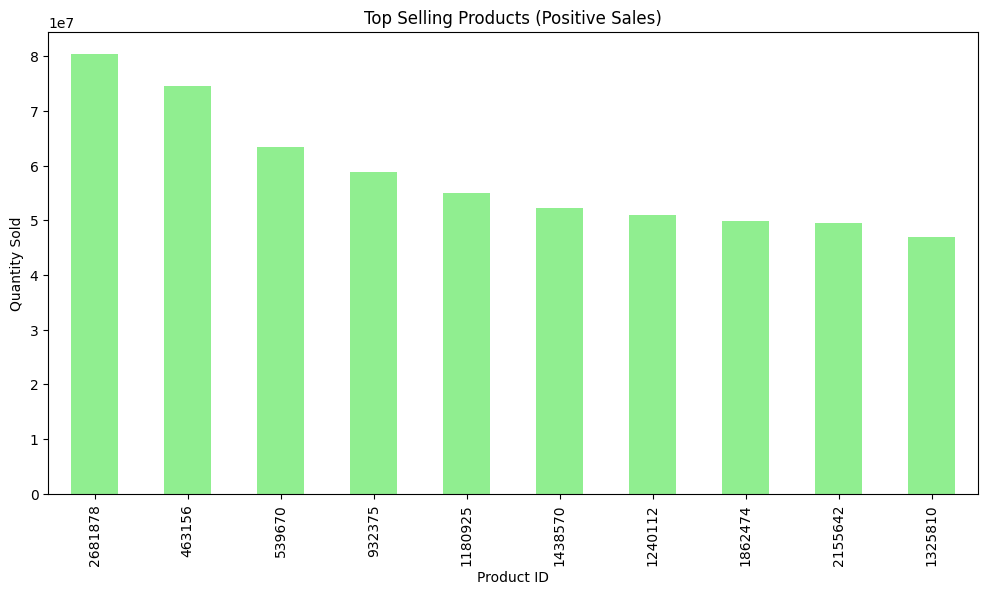

In [112]:
top_positive_products = positive_sales_net.groupby('product_id')['quantity'].sum().nlargest(10)

# Plotting the top selling products for positive sales
plt.figure(figsize=(12, 6))
top_positive_products.plot(kind='bar', color='lightgreen')
plt.title('Top Selling Products (Positive Sales)')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.grid(False)  
plt.show()

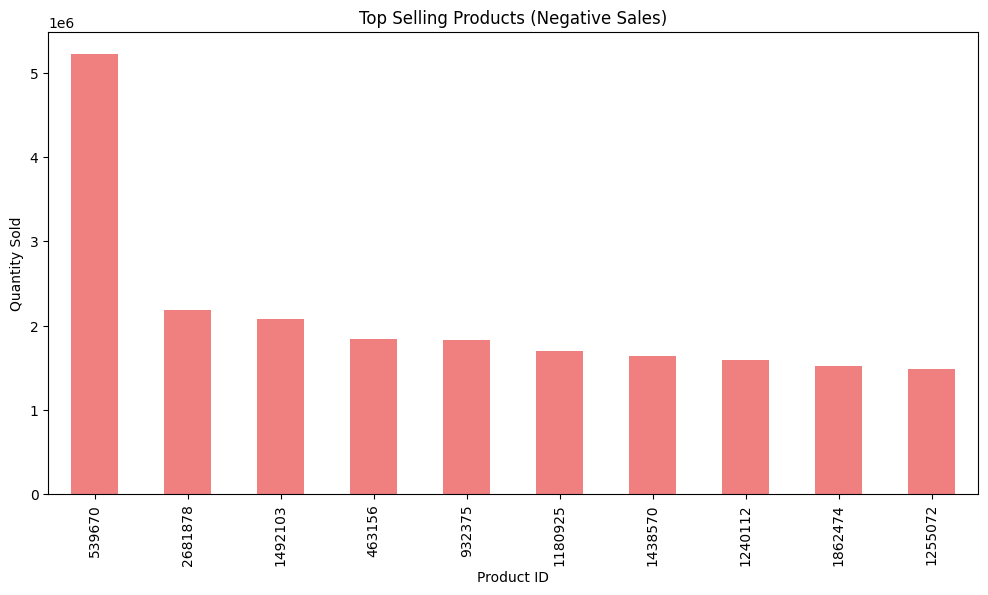

In [113]:
top_negative_products = negative_sales_net.groupby('product_id')['quantity'].sum().nlargest(10)

# Plotting the top selling products for negative sales
plt.figure(figsize=(12, 6))
top_negative_products.plot(kind='bar', color='lightcoral')
plt.title('Top Selling Products (Negative Sales)')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.grid(False) 
plt.show()

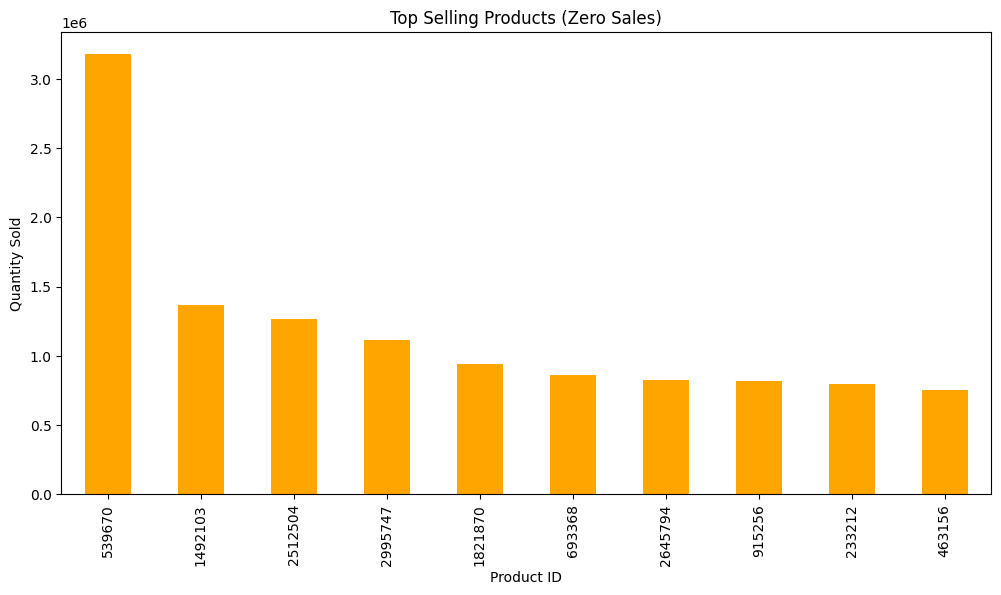

In [114]:
top_zero_products = zero_sales_net.groupby('product_id')['quantity'].sum().nlargest(10)

# Plotting the top selling products for zero sales
plt.figure(figsize=(12, 6))
top_zero_products.plot(kind='bar', color='orange')
plt.title('Top Selling Products (Zero Sales)')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.grid(False)  
plt.show()

## **What do we observe here?**

The top-selling product 539670 remains consistent across both negative and positive sales, indicating a high-demand item with quantities surpassing others. This consistency in top-selling products suggests a key product that consistently attracts attention and drives sales for ClientCo.
